
# Exploratory Data Analysis (EDA)

## Overall Summary
- Merge two tables, CustomerDemographic_df and Transactions_df, using an inner join to create a single Transaction table for our analysis
- I have created an RMF table to categorize customers based on recency, frequency, and monetary analysis

**Transaction**
- Add the columns "Age","Age_category" "Profit," and "transaction_month" to the Transaction table for analysis
- Found some outliers in the age, standard_cost column
- I remove 0.5% outliers data in which persons age is grater then 100
- Among all the products, Product 0 stands out with a sales share of 6%, which is the highest. The remaining 100 out of 101 products contribute sales ranging from 0.2% to 2% of the overall total
- 2% 'no data' values in online_order
- Online and Offline order are almost same
- 1% order is cancelled.I drop the Cancelled order transaction to analyse the potential customer data.
- Most product are sell out from brand 'Solex' overall 22% of the sales and Least product from brand 'Norco Bicycles' overall 15% of the sales
- Most Sell out product are from Standard overall 72% of the sales and Least from Mountain product_line overall 2% of the sales
- Medium Class product are sell out more overall 70% of the sales
- Medium size product are sell out more overall 66% of the sales
- Among customers, females slightly outnumber males.
- 16% of customers do not have any job category specified
- The majority of sales are from the Health, Manufacturing, and Financial Services sectors, accounting for about 16% ,21% and 20%, respectively. Overall 57% of the sales.
- 50% of sales are belong to the Mass Customer category
- Approximately 50% of customers own a car, while the remaining 50% do not own a car
- Among the three states, more than 50% of customers are from New South Wales, Australia
- Orders and Profit are hight at oct month
- Among customers who own a car, 55% are from New South Wales (NSW)
- The male-to-female ratio across the states is nearly equal, with slightly more female customers than male customers
- People aged 40-50 have more bike-related purchases than other age groups
- The 40-50 age group within the mass customer segment generates more profit
- Manufacturing and Financial Services have more bike-related purchases than other job industry
- New South Wales stands out as a 50% more profitable state compared to others. Interestingly, individuals who own a car in this state have contributed significantly more to the profit compared to those who don't own a car
- The month of October is more profitable than the other months

**NewCustomerList_df**
- Add the columns "Age", "Age_category"  to the NewCustomerList_df table for analysis
- Since most of the new customers fall within the age range of 40 to 50, we should target them as they are likely to make more purchases, as indicated by our Transaction table analysis
- Given that most new customers in the "newcustomer_table" belong to the Mass Customer category and exhibit similar gender, car ownership, and state ratios as seen in the transaction table, it is beneficial to target this group for marketing efforts based on historical data patterns
- People in their forties and sixties have slightly more bikes than other age groups

**RMF_Table**
- The majority of customers have a "Bronze" customer_title, followed by "Gold" at second place, with 29% and 27% respectively

In [181]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [182]:
xls = pd.ExcelFile('/Users/rameezkhan/Desktop/KMPG_Project/Task1_DataCleaning/KMPG_transform_data.xlsx')
#list of sheet name
sheets = xls.sheet_names

#Create a data Frame
CustomerDemographic_df = pd.read_excel(xls, 'CustomerDemographic_df', index_col= False)
Transactions_df = pd.read_excel(xls, 'Transactions_df', index_col= False)
NewCustomerList_df = pd.read_excel(xls, 'NewCustomerList_df', index_col= False)

In [183]:
CustomerDemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   first_name                           3907 non-null   object        
 2   last_name                            3907 non-null   object        
 3   gender                               3907 non-null   object        
 4   past_3_years_bike_related_purchases  3907 non-null   int64         
 5   DOB                                  3907 non-null   datetime64[ns]
 6   job_title                            3907 non-null   object        
 7   job_industry_category                3907 non-null   object        
 8   wealth_segment                       3907 non-null   object        
 9   deceased_indicator                   3907 non-null   object        
 10  owns_car    

In [184]:
Transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19800 non-null  int64         
 1   product_id               19800 non-null  int64         
 2   customer_id              19800 non-null  int64         
 3   transaction_date         19800 non-null  datetime64[ns]
 4   online_order             19800 non-null  object        
 5   order_status             19800 non-null  object        
 6   brand                    19800 non-null  object        
 7   product_line             19800 non-null  object        
 8   product_class            19800 non-null  object        
 9   product_size             19800 non-null  object        
 10  list_price               19800 non-null  float64       
 11  standard_cost            19800 non-null  float64       
 12  product_first_sold_date  19800 n

In [185]:
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In [186]:
#Join the CustomerDemographic_df,Transactions_df table for Analysis
Transaction = Transactions_df.merge(CustomerDemographic_df, on= 'customer_id')

In [187]:
Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5


### Feature Engineering
- ADD Some Coulme required for Analysis

In [188]:
# Add profit Column
Transaction['profit'] = Transaction['list_price'] - Transaction['standard_cost']

In [189]:
#Add an "Age" Column when a Customer Makes a Purchase from Transaction Table
current_date = datetime.now()
Transaction['Age'] = (current_date - Transaction['DOB']).astype('<m8[Y]') 

In [190]:
#Add an "Age_Category" Column in Transaction Table
#Define the age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Create a new 'age_category' column based on the age bins
Transaction['Age_category'] = pd.cut(Transaction['Age'], bins=age_bins, labels=age_labels)

In [191]:
#Add an "Age" Column from NewCustomerList
current_date = datetime.now()
NewCustomerList_df['Age'] = (current_date - NewCustomerList_df['DOB']).astype('<m8[Y]') 

In [192]:
#Add an "Age_Category" Column in Transaction Table
#Define the age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Create a new 'age_category' column based on the age bins
NewCustomerList_df['Age_category'] = pd.cut(NewCustomerList_df['Age'], bins=age_bins, labels=age_labels)

In [193]:
# Add Transaction Month
Transaction['transaction_month'] = Transaction['transaction_date'].dt.month_name()

In [194]:
#Add Recency Column
Recent_date = Transaction['transaction_date'].max()

Transaction['Recency'] = Recent_date - Transaction['transaction_date']

## Transaction Table

In [195]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19327 entries, 0 to 19326
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   transaction_id                       19327 non-null  int64          
 1   product_id                           19327 non-null  int64          
 2   customer_id                          19327 non-null  int64          
 3   transaction_date                     19327 non-null  datetime64[ns] 
 4   online_order                         19327 non-null  object         
 5   order_status                         19327 non-null  object         
 6   brand                                19327 non-null  object         
 7   product_line                         19327 non-null  object         
 8   product_class                        19327 non-null  object         
 9   product_size                         19327 non-null  object         
 10

### Column Type
- Numerical Column : transaction_id, list_price, standard_cost, product_first_sold_date, past_3_years_bike_related_purchases, DOB, tenure, postcode, property_valuation, profit, Age

- Categorical data : product_id, customer_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, gender, job_industry_category, wealth_segment, owns_car, state, transaction_month, Age_category

- Mixed : first_name, last_name, job_title, deceased_indicator, address, country

# Univeriant Analysis

## Numerical Column

### Age
**Conclusion**
- Found some outliers in the age column
- I remove 0.5% outliers data in which persons age is grater then 100
- More customers are buying the product in the age range of 40 to 50.
- Age is now almost Normaly Distributed

In [196]:
Transaction['Age'].describe()

count    19327.000000
mean        45.660734
std         12.894124
min         21.000000
25%         36.000000
50%         46.000000
75%         55.000000
max        179.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

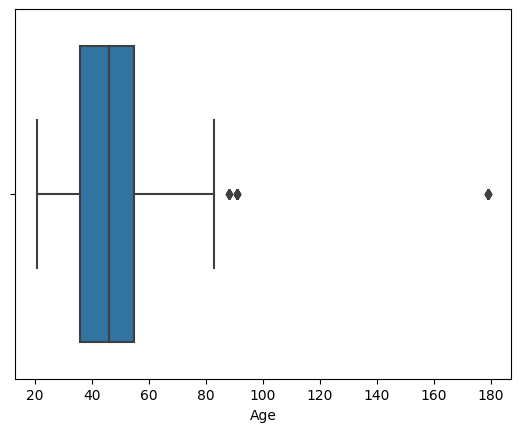

In [197]:
sns.boxplot(x= Transaction['Age'])

In [198]:
Transaction['Age'].sort_values(ascending=False).head(10)

5680    179.0
5679    179.0
5678    179.0
5677    179.0
5676    179.0
5675    179.0
5681    179.0
5682    179.0
2355     91.0
2359     91.0
Name: Age, dtype: float64

In [199]:
index_ref = Transaction[Transaction['Age'] > 100].index

Transaction = Transaction.drop(index_ref)

<Axes: xlabel='Age'>

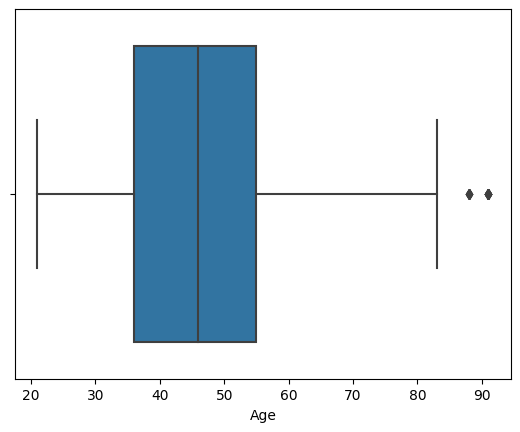

In [200]:
sns.boxplot(x= Transaction['Age'])

<Axes: xlabel='Age', ylabel='Count'>

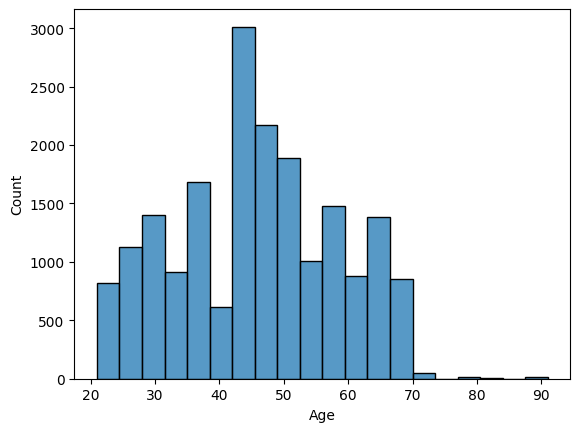

In [201]:
sns.histplot(x= Transaction['Age'], bins = 20)

<Axes: xlabel='Age', ylabel='Density'>

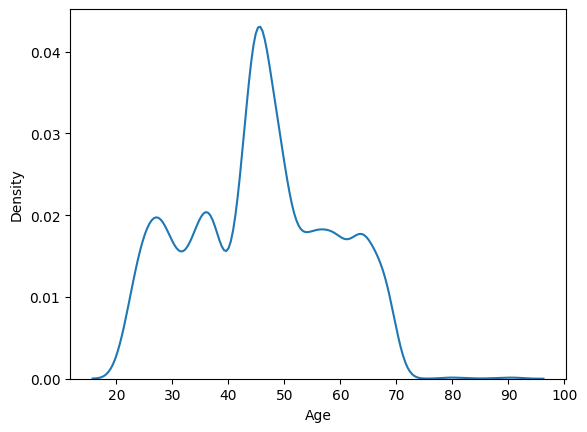

In [202]:
sns.kdeplot(x= Transaction['Age'])

In [203]:
Transaction['Age'].skew()

0.01806171024077804

### profit
**Conclusion**
- No outliers in it
- Data is psitively/right skewded

In [204]:
Transaction['profit'].describe()

count    19319.000000
mean       550.525856
std        492.915216
min          4.800000
25%        133.780000
50%        445.210000
75%        827.160000
max       1702.550000
Name: profit, dtype: float64

<Axes: xlabel='profit'>

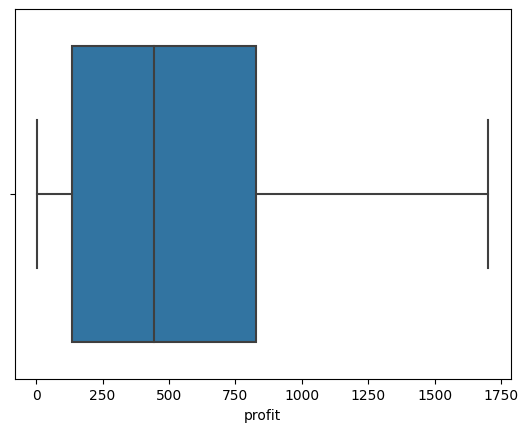

In [205]:
sns.boxplot(x= Transaction['profit'])

<Axes: xlabel='profit', ylabel='Count'>

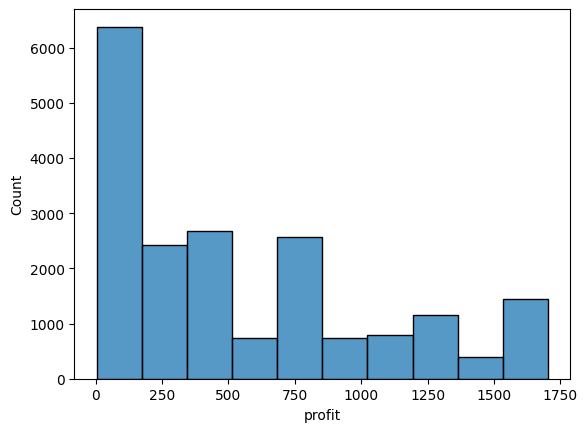

In [206]:
sns.histplot(x= Transaction['profit'], bins= 10)

<Axes: xlabel='profit', ylabel='Density'>

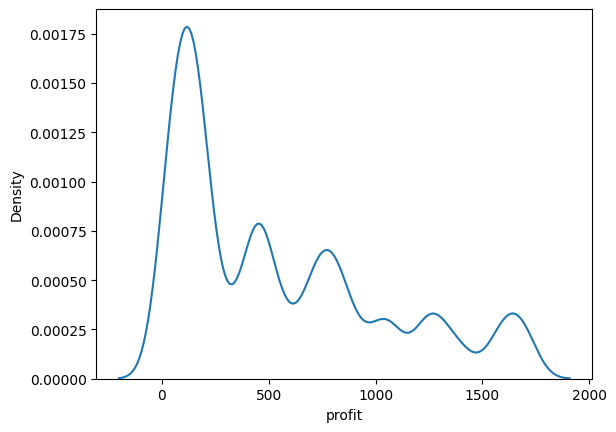

In [207]:
sns.kdeplot(x= Transaction['profit'])

In [208]:
Transaction['profit'].skew()

0.8539274754741518

In [209]:
Transaction['profit'].isnull().sum()

0

### property_valuation
**Conclusion**
- Data is negaitvely/left skewded
- no missing values
- no outliers present in it

In [210]:
Transaction['property_valuation'].describe()

count    19319.000000
mean         7.517884
std          2.825970
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: property_valuation, dtype: float64

<Axes: xlabel='property_valuation'>

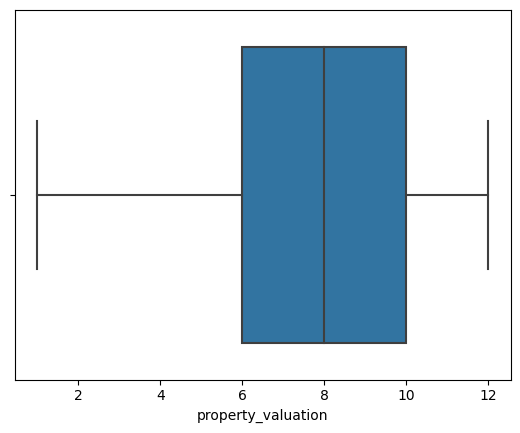

In [211]:
sns.boxplot(x = Transaction['property_valuation'])

<Axes: xlabel='property_valuation', ylabel='Count'>

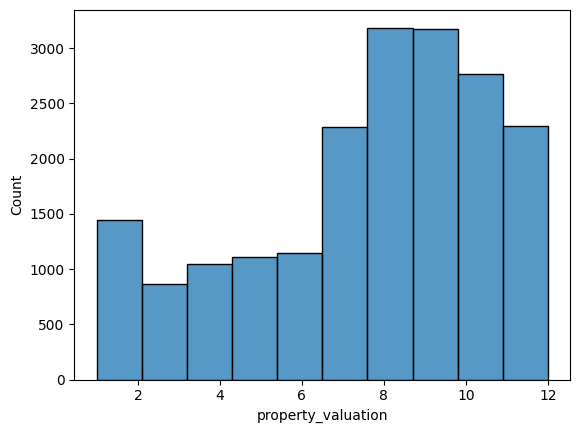

In [212]:
sns.histplot(x = Transaction['property_valuation'],bins = 10)

<Axes: xlabel='property_valuation', ylabel='Density'>

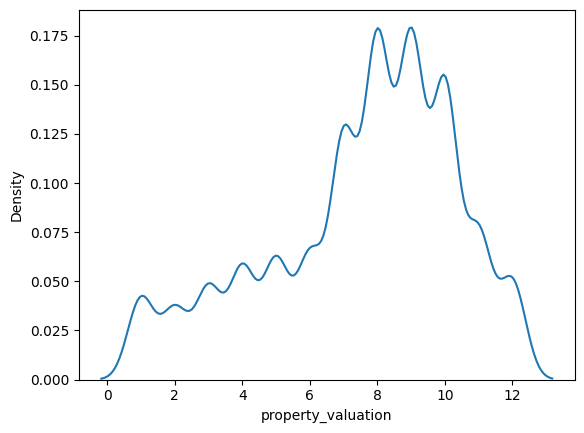

In [213]:
sns.kdeplot(x = Transaction['property_valuation'])

In [214]:
Transaction['property_valuation'].skew()

-0.6421696315653644

In [215]:
Transaction['property_valuation'].isnull().sum()

0

### tenure
**Conclusion**
- tenure is almost Normaly Distributed
- no missing values
- no outliers present in it

In [216]:
Transaction['tenure'].describe()

count    19319.000000
mean        10.682437
std          5.673114
min          1.000000
25%          6.000000
50%         11.000000
75%         15.000000
max         22.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure'>

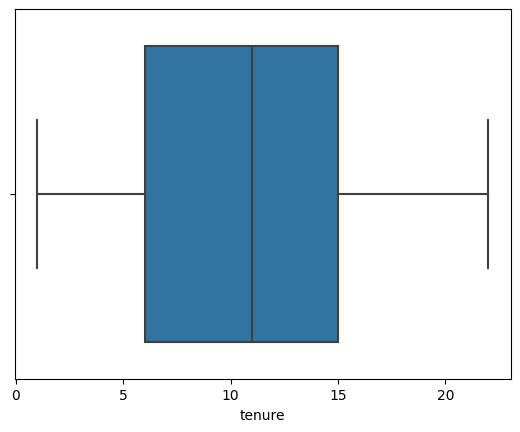

In [217]:
sns.boxplot(x = Transaction['tenure'])

<Axes: xlabel='tenure', ylabel='Count'>

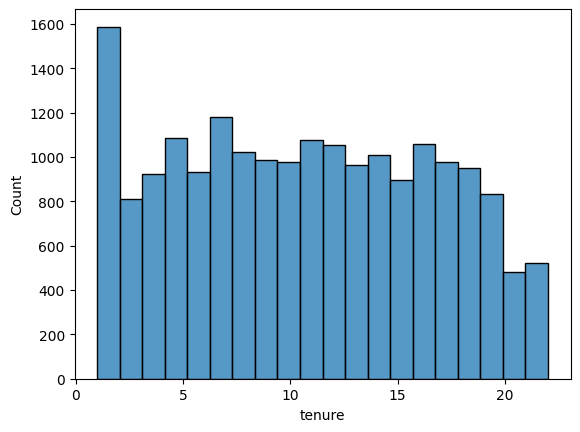

In [218]:
sns.histplot(x = Transaction['tenure'], bins = 20)

<Axes: xlabel='tenure', ylabel='Density'>

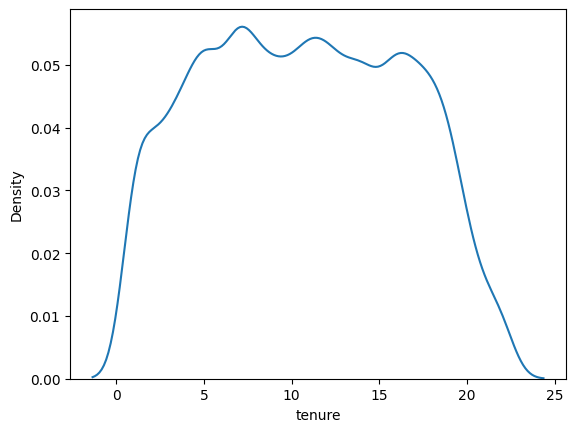

In [219]:
sns.kdeplot(x = Transaction['tenure'])

In [220]:
Transaction['tenure'].skew()

0.04320610608395031

In [221]:
Transaction['tenure'].isnull().sum()

0

### past_3_years_bike_related_purchases
**Conclusion**
- past_3_years_bike_related_purchases is almost Normaly Distributed
- no missing values
- no outliers present in it


In [222]:
Transaction['past_3_years_bike_related_purchases'].describe()

count    19319.000000
mean        48.923443
std         28.642610
min          0.000000
25%         24.000000
50%         48.000000
75%         73.000000
max         99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

<Axes: xlabel='past_3_years_bike_related_purchases'>

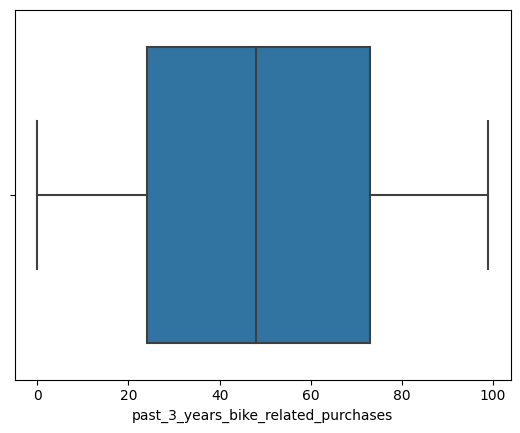

In [223]:
sns.boxplot(x = Transaction['past_3_years_bike_related_purchases'])

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

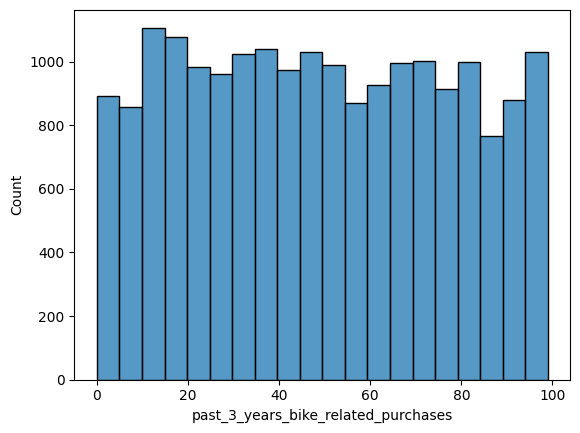

In [224]:
sns.histplot(x = Transaction['past_3_years_bike_related_purchases'], bins=20)

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

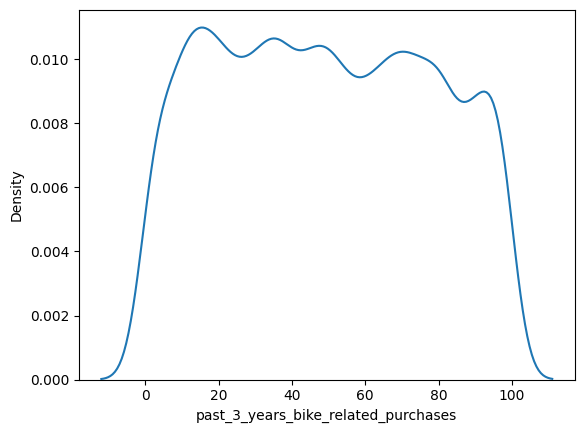

In [225]:
sns.kdeplot(x = Transaction['past_3_years_bike_related_purchases'])

In [226]:
Transaction['past_3_years_bike_related_purchases'].skew()

0.05180092263672613

In [227]:
Transaction['past_3_years_bike_related_purchases'].isnull().sum()

0

### standard_cost
**Conclusion**
- Some outliers is present in it.
- Slightly positively/right skewed data

In [228]:
Transaction['standard_cost'].describe()

count    19319.000000
mean       555.762173
std        405.692537
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

<Axes: xlabel='standard_cost'>

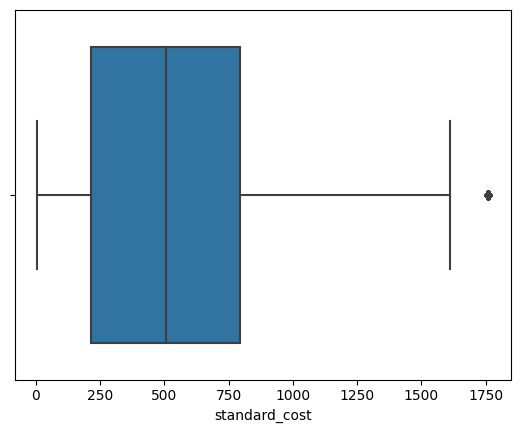

In [229]:
sns.boxplot(x = Transaction['standard_cost'])

In [230]:
Transaction[Transaction['standard_cost']> 1750]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,address,postcode,state,country,property_valuation,profit,Age,Age_category,transaction_month,Recency
34,3369,60,2339,2017-05-21,0,Approved,Giant Bicycles,Standard,high,small,...,7174 Thackeray Point,2153,NSW,Australia,10,217.51,64.0,61-70,May,223 days
184,3733,60,2666,2017-03-17,1,Approved,Giant Bicycles,Standard,high,small,...,0 Knutson Crossing,2151,NSW,Australia,8,217.51,52.0,51-60,March,288 days
245,12642,60,2916,2017-11-12,0,Approved,Giant Bicycles,Standard,high,small,...,2 Blue Bill Park Lane,4220,QLD,Australia,8,217.51,54.0,51-60,November,48 days
446,6195,60,1506,2017-03-21,1,Approved,Giant Bicycles,Standard,high,small,...,6 Canary Plaza,2223,NSW,Australia,8,217.51,65.0,61-70,March,284 days
700,11387,60,1076,2017-09-26,0,Approved,Giant Bicycles,Standard,high,small,...,44 Ramsey Road,2515,NSW,Australia,9,217.51,23.0,21-30,September,95 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18590,8976,60,3426,2017-11-15,1,Approved,Giant Bicycles,Standard,high,small,...,3047 Spenser Pass,2750,NSW,Australia,8,217.51,64.0,61-70,November,45 days
18609,9461,60,3066,2017-07-19,1,Approved,Giant Bicycles,Standard,high,small,...,4 Gateway Court,3107,VIC,Australia,10,217.51,28.0,21-30,July,164 days
18877,10200,60,1334,2017-05-04,0,Approved,Giant Bicycles,Standard,high,small,...,433 Mockingbird Center,3840,VIC,Australia,2,217.51,24.0,21-30,May,240 days
19029,18741,60,1142,2017-11-22,0,Approved,Giant Bicycles,Standard,high,small,...,5998 Bayside Terrace,2526,NSW,Australia,9,217.51,25.0,21-30,November,38 days


<Axes: xlabel='standard_cost', ylabel='Count'>

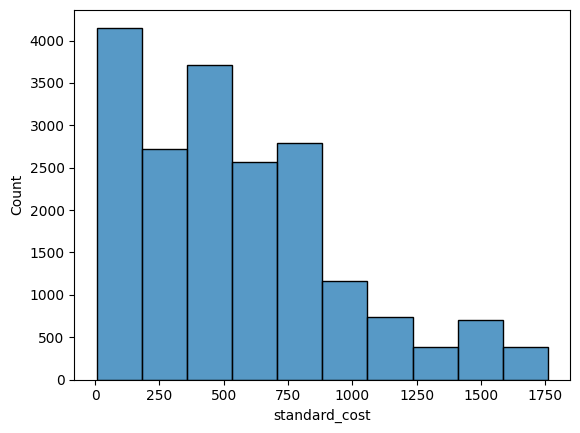

In [231]:
sns.histplot(x = Transaction['standard_cost'], bins= 10)

<Axes: xlabel='standard_cost', ylabel='Density'>

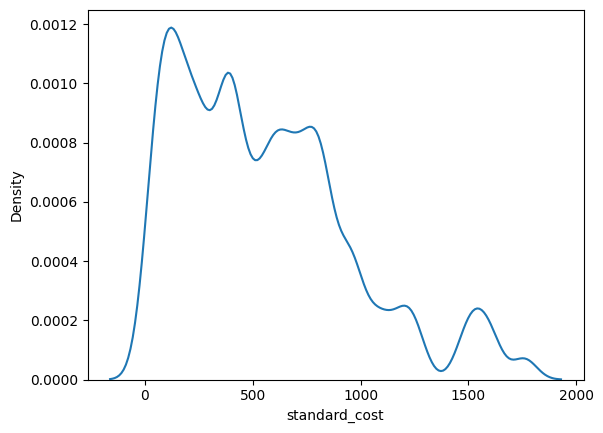

In [232]:
sns.kdeplot(x = Transaction['standard_cost'])

In [233]:
Transaction['standard_cost'].skew()

0.8623809472913826

In [234]:
Transaction['standard_cost'].isnull().sum()

0

### list_price
**Conclusion**
- No outliers in it
- Data is slightly negaitvely/left skewded

In [235]:
Transaction['list_price'].describe()

count    19319.000000
mean      1106.288029
std        582.864043
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

<Axes: xlabel='list_price'>

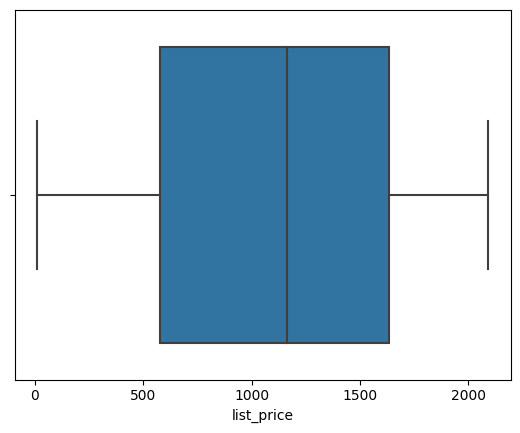

In [236]:
sns.boxplot(x=Transaction['list_price'])

<Axes: xlabel='list_price', ylabel='Count'>

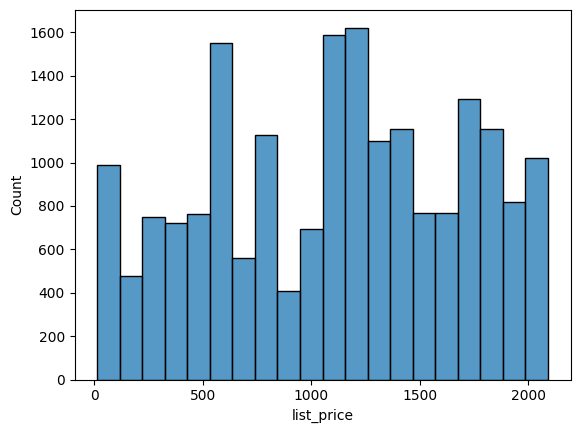

In [237]:
sns.histplot(x=Transaction['list_price'], bins=20)

<Axes: xlabel='list_price', ylabel='Density'>

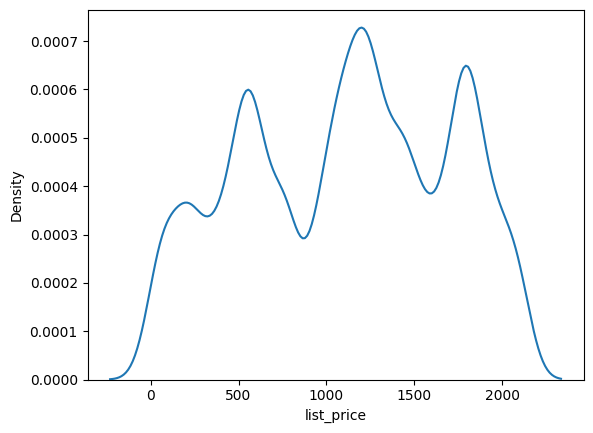

In [238]:
sns.kdeplot(x=Transaction['list_price'])

In [239]:
Transaction['list_price'].skew()

-0.12431499486636079

## Categorical Column

### product_id
**Conclusion**
- Among all the products, Product 0 stands out with a sales share of 6%, which is the highest. The remaining 100 out of 101 products contribute sales ranging from 0.2% to 2% of the overall total.

In [240]:
Transaction['product_id'].value_counts()

0      1148
3       345
1       306
35      265
38      265
       ... 
16      134
75      132
8       131
100     123
47      117
Name: product_id, Length: 101, dtype: int64

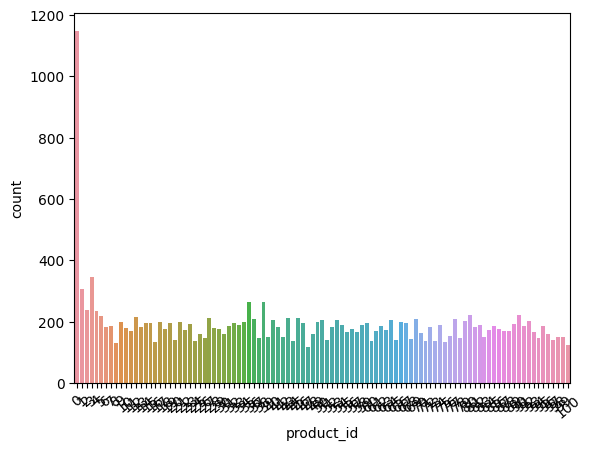

In [241]:
product =sns.countplot(x= Transaction['product_id'])
product.set_xticklabels(product.get_xticklabels(), rotation =40);

<Axes: ylabel='product_id'>

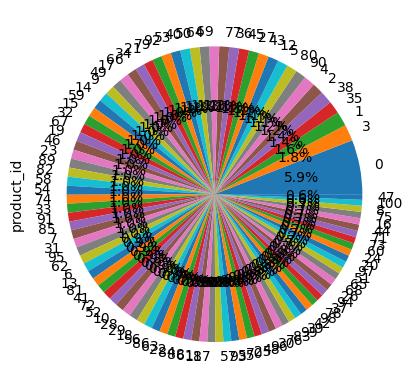

In [242]:
Transaction['product_id'].value_counts().plot(kind='pie', autopct = '%0.1f%%')

### online_order
**Conclusion**
- 2% 'no data' values in it.
- Online and Offline order are almost same

In [243]:
Transaction['online_order'].value_counts()

1          9498
0          9472
no data     349
Name: online_order, dtype: int64

<Axes: xlabel='online_order', ylabel='count'>

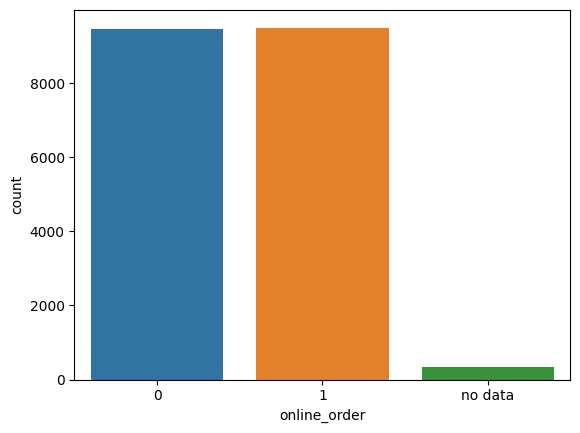

In [244]:
sns.countplot(x= Transaction['online_order'])

<Axes: ylabel='online_order'>

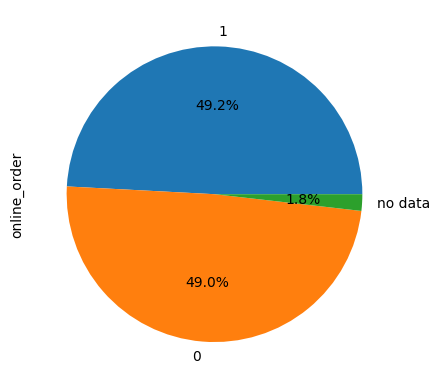

In [245]:
Transaction['online_order'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### order_status
**Conclusion**
- 1% order is cancelled.
- Drop the Cancelled order transaction to analyse the potential customer data.

In [246]:
Transaction['order_status'].value_counts()

Approved     19144
Cancelled      175
Name: order_status, dtype: int64

<Axes: xlabel='order_status', ylabel='count'>

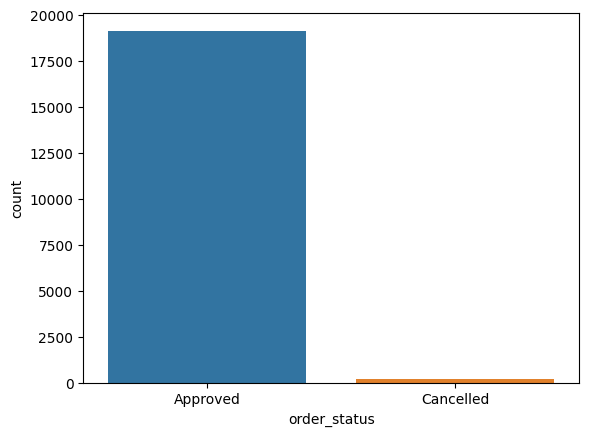

In [247]:
sns.countplot(x= Transaction['order_status'])

<Axes: ylabel='order_status'>

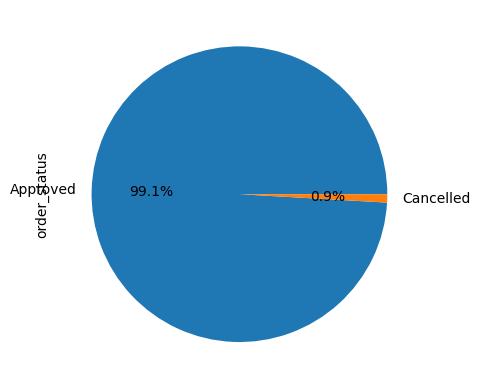

In [248]:
Transaction['order_status'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

In [249]:
#Drop Cancel order rows
index_ref = Transaction[Transaction['order_status'] == 'Cancelled'].index

Transaction = Transaction.drop(index_ref)

### brand
**Conclusion**
- Most product are sell out from brand 'Solex' overall 22% of the sales
- Least product are sell out from brand 'Norco Bicycles' overall 15% of the sales

In [250]:
Transaction['brand'].value_counts()

Solex             4127
Giant Bicycles    3208
WeareA2B          3171
OHM Cycles        2947
Trek Bicycles     2889
Norco Bicycles    2802
Name: brand, dtype: int64

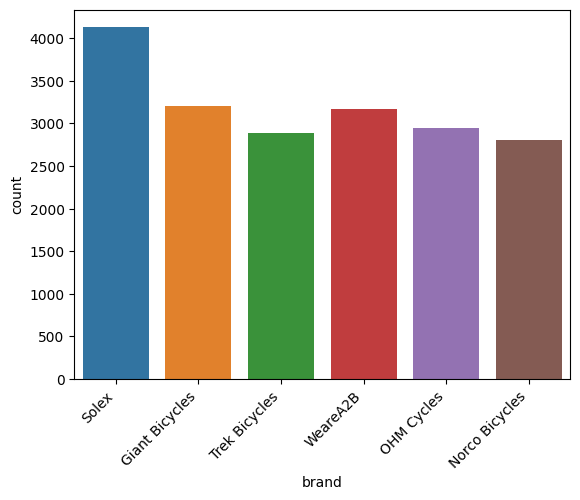

In [251]:
brand = sns.countplot(x =Transaction['brand'] )
brand.set_xticklabels(brand.get_xticklabels(), rotation =45, horizontalalignment = 'right');

<Axes: ylabel='brand'>

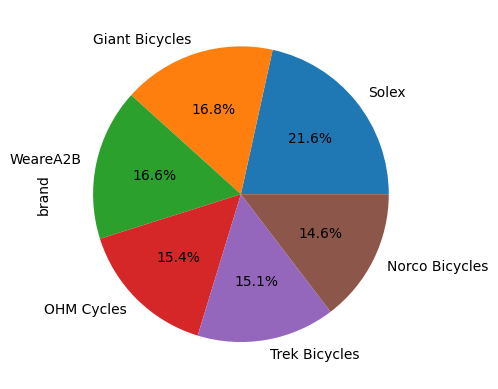

In [252]:
Transaction['brand'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### product_line
**Conclusion**
- Most Sell out product are from Standard product_line overall 72% of the sales
- Least Sell out product are from Mountain product_line overall 2% of the sales

In [253]:
Transaction['product_line'].value_counts()

Standard    13721
Road         3832
Touring      1182
Mountain      409
Name: product_line, dtype: int64

<Axes: xlabel='product_line', ylabel='count'>

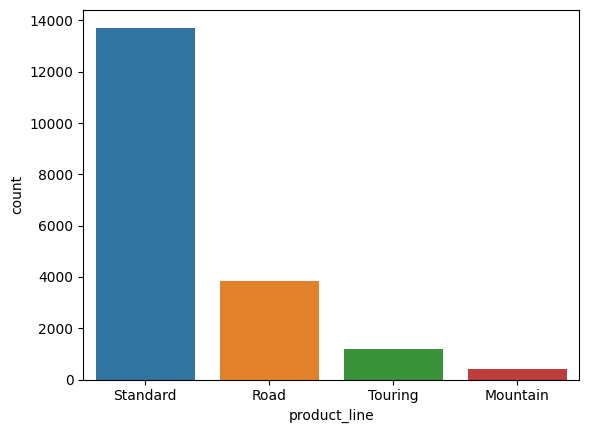

In [254]:
sns.countplot(x =Transaction['product_line'])

<Axes: ylabel='product_line'>

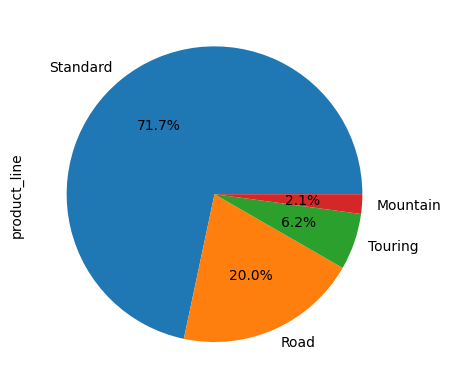

In [255]:
Transaction['product_line'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### product_class
**Conclusion**
- Medium Class product are Sell out more overall 70% of the sales

In [256]:
Transaction['product_class'].value_counts()

medium    13348
high       2910
low        2886
Name: product_class, dtype: int64

<Axes: xlabel='product_class', ylabel='count'>

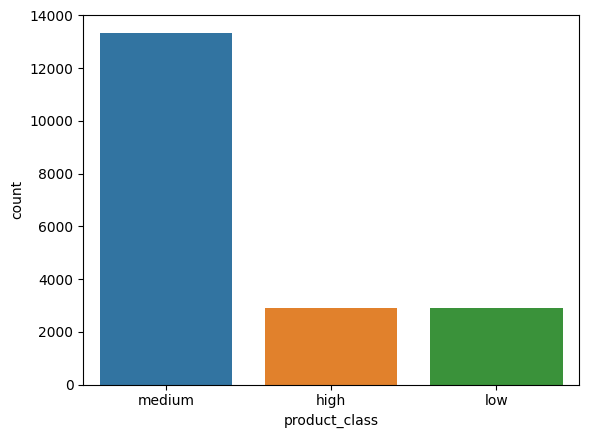

In [257]:
sns.countplot(x=Transaction['product_class'])

<Axes: ylabel='product_class'>

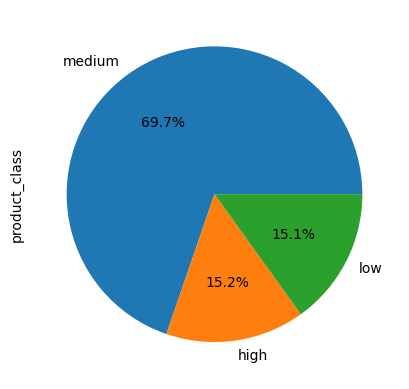

In [258]:
Transaction['product_class'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### product_size
**Conclusion**
- Medium size product are sell out more overall 66% of the sales

In [259]:
Transaction['product_size'].value_counts()

medium    12566
large      3842
small      2736
Name: product_size, dtype: int64

<Axes: xlabel='product_size', ylabel='count'>

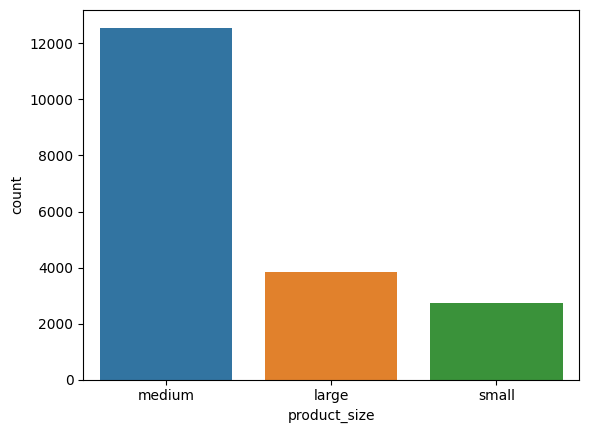

In [260]:
sns.countplot(x=Transaction['product_size'])

<Axes: ylabel='product_size'>

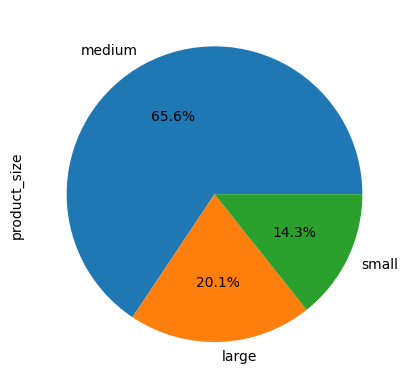

In [261]:
Transaction['product_size'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### gender
**Conclusion**
- Among customers, females slightly outnumber males

In [262]:
Transaction['gender'].value_counts()

Female    9809
Male      9335
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

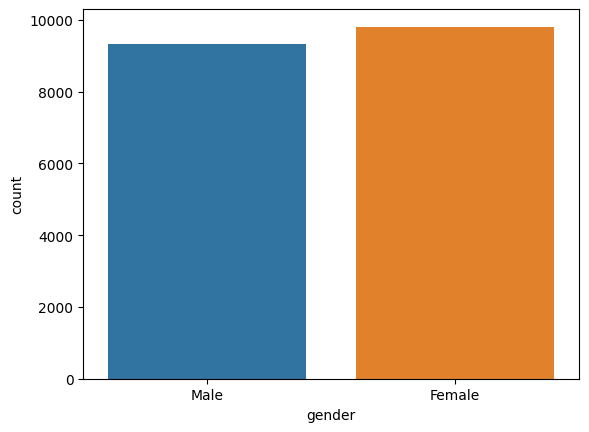

In [263]:
sns.countplot(x=Transaction['gender'])

<Axes: ylabel='gender'>

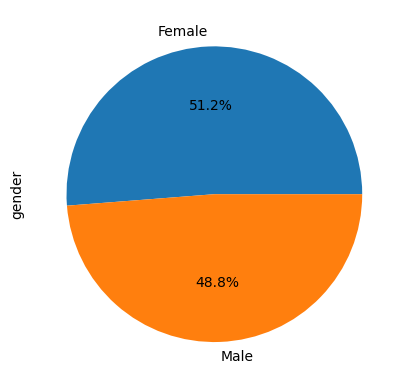

In [264]:
Transaction['gender'].value_counts().plot(kind= 'pie', autopct= '%0.1f%%')

### job_industry_category
**Conclusion**
- 16% of customers do not have any job category specified
- The majority of sales are from the Manufacturing and Financial Services sectors, accounting for about 21% and 20%, respectively

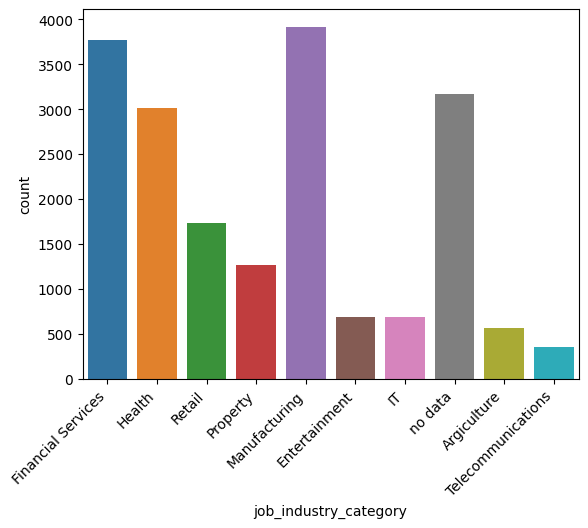

In [265]:
JI = sns.countplot(x=Transaction['job_industry_category'])
JI.set_xticklabels(JI.get_xticklabels(), rotation =45, horizontalalignment = 'right');

<Axes: ylabel='job_industry_category'>

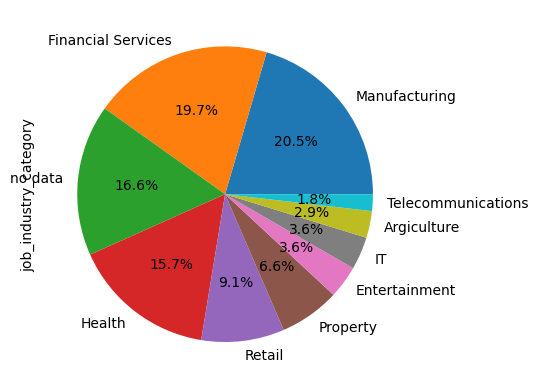

In [266]:
Transaction['job_industry_category'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### wealth_segment
**Conclusion**
- 50% of customers belong to the Mass Customer category

In [267]:
Transaction['wealth_segment'].value_counts()

Mass Customer        9594
High Net Worth       4888
Affluent Customer    4662
Name: wealth_segment, dtype: int64

<Axes: xlabel='wealth_segment', ylabel='count'>

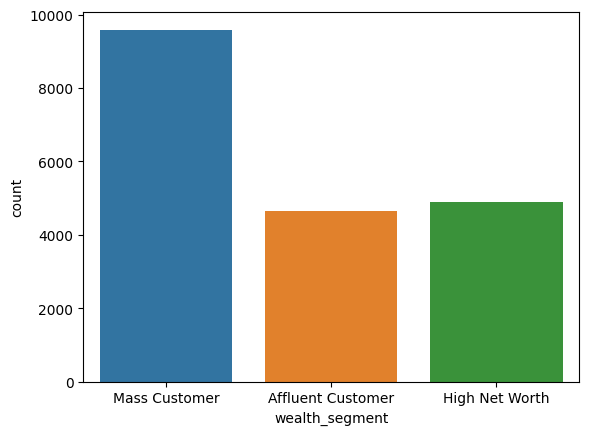

In [268]:
sns.countplot(x=Transaction['wealth_segment'])

<Axes: ylabel='wealth_segment'>

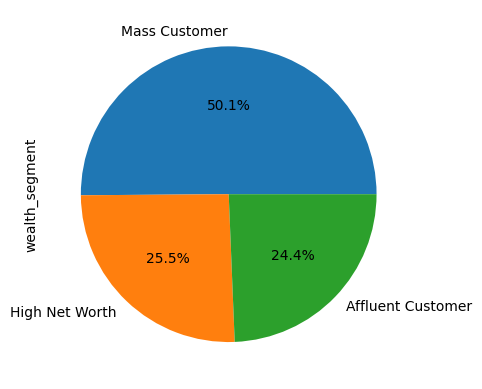

In [269]:
Transaction['wealth_segment'].value_counts().plot(kind='pie', autopct ='%0.1f%%')

### owns_car
**Conclusion**
- Approximately 50% of customers own a car, while the remaining 50% do not own a car.

In [270]:
Transaction['owns_car'].value_counts()

Yes    9612
No     9532
Name: owns_car, dtype: int64

<Axes: xlabel='owns_car', ylabel='count'>

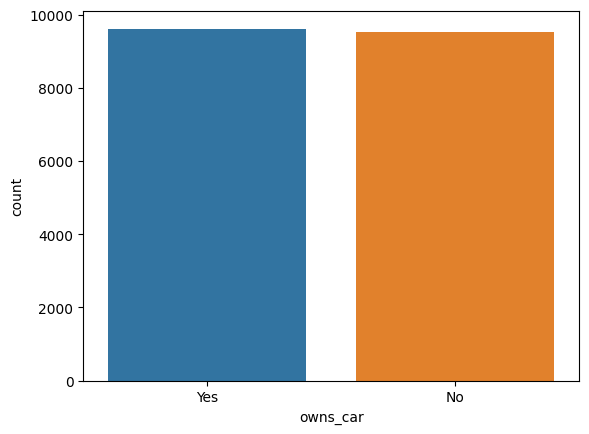

In [271]:
sns.countplot(x=Transaction['owns_car'])

<Axes: ylabel='owns_car'>

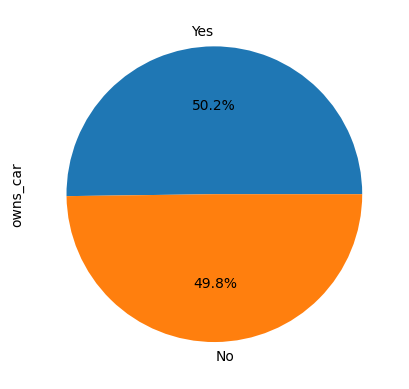

In [272]:
Transaction['owns_car'].value_counts().plot(kind='pie', autopct ='%0.1f%%')

### state
**Conclusion**
- Among the three states, more than 50% of customers are from New South Wales, Australia

In [273]:
Transaction['state'].value_counts()

NSW    10224
VIC     4819
QLD     4101
Name: state, dtype: int64

<Axes: xlabel='state', ylabel='count'>

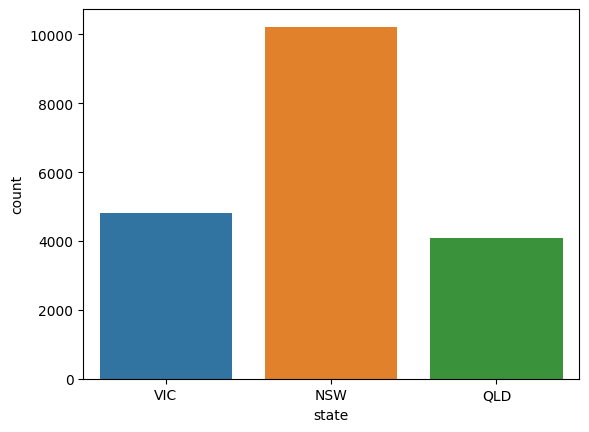

In [274]:
sns.countplot(x=Transaction['state'])

<Axes: ylabel='state'>

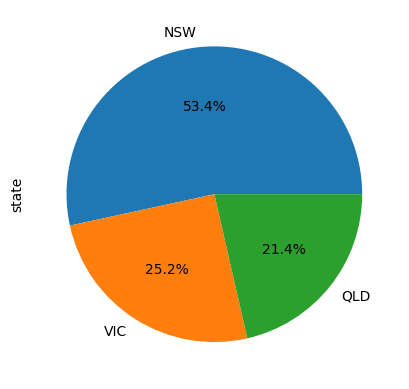

In [275]:
Transaction['state'].value_counts().plot(kind='pie', autopct ='%0.1f%%')

### transaction_month
**Conclusion**
- Orders are relatively constant throughout all months

In [276]:
Transaction['transaction_month'].value_counts()

October      1703
August       1674
July         1635
May          1621
January      1607
November     1600
February     1579
April        1578
March        1577
December     1564
September    1504
June         1502
Name: transaction_month, dtype: int64

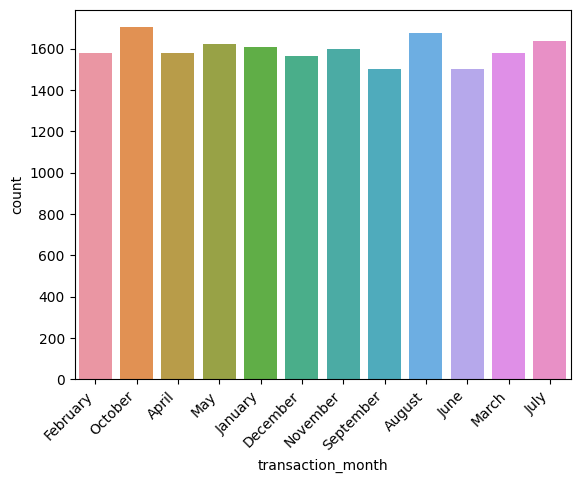

In [277]:
month = sns.countplot(x=Transaction['transaction_month'])
month.set_xticklabels(month.get_xticklabels(), rotation =45, horizontalalignment = 'right');

<Axes: ylabel='transaction_month'>

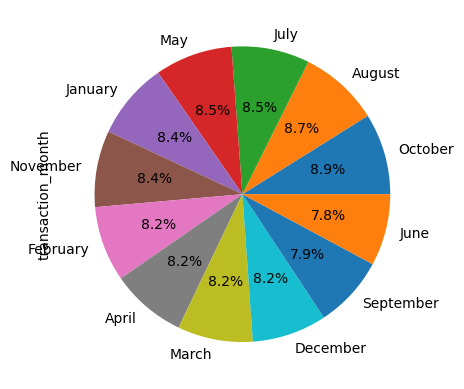

In [278]:
Transaction['transaction_month'].value_counts().plot(kind='pie', autopct ='%0.1f%%')

### Age_category
**Conclusion**
- 30% of customers are in their forties, and 20% are in their fifties. Overall, 50% of customer acquisitions are in the age group between 30 and 50 years

In [279]:
Transaction['Age_category'].value_counts()

41-50    6595
51-60    3392
31-40    3219
21-30    3042
61-70    2866
80+        18
71-80      12
0-10        0
11-20       0
Name: Age_category, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

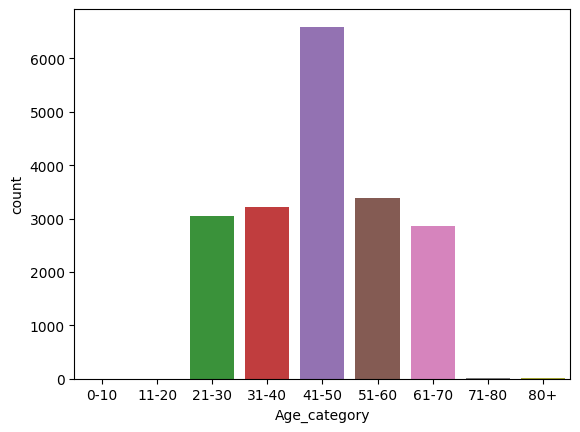

In [280]:
sns.countplot(x=Transaction['Age_category'])

<Axes: ylabel='Age_category'>

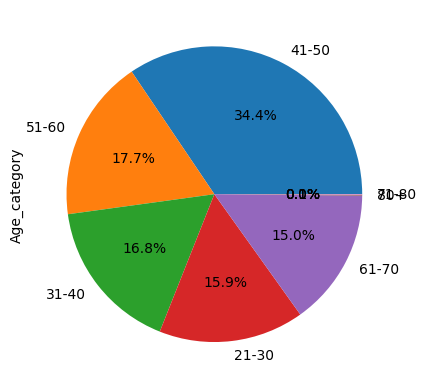

In [281]:
Transaction['Age_category'].value_counts().plot(kind='pie', autopct ='%0.1f%%')

# Biveriant Analysis


In [282]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19144 entries, 0 to 19326
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   transaction_id                       19144 non-null  int64          
 1   product_id                           19144 non-null  int64          
 2   customer_id                          19144 non-null  int64          
 3   transaction_date                     19144 non-null  datetime64[ns] 
 4   online_order                         19144 non-null  object         
 5   order_status                         19144 non-null  object         
 6   brand                                19144 non-null  object         
 7   product_line                         19144 non-null  object         
 8   product_class                        19144 non-null  object         
 9   product_size                         19144 non-null  object         
 10

## Categorical-Numerical Column
**Conclusion**
- People aged between 40-50 have more bike-related purchases than other age groups
- Manufacturing and Financial Services have more bike-related purchases than other job industry
- New South Wales is a more profitable state than the others
- The month of October is more profitable than the other months

<Axes: xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

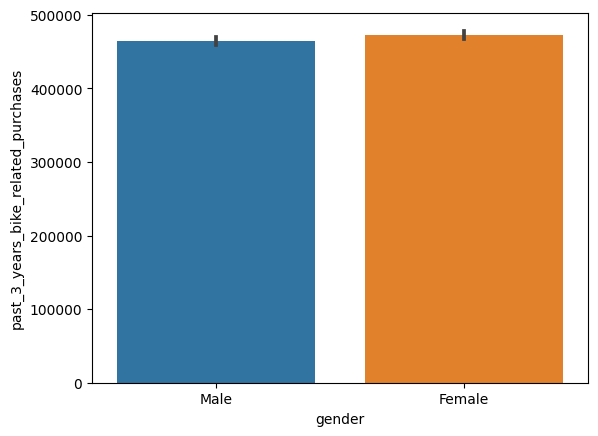

In [283]:
sns.barplot(x= Transaction['gender'], y = Transaction['past_3_years_bike_related_purchases'],estimator=sum)

<Axes: xlabel='Age_category', ylabel='past_3_years_bike_related_purchases'>

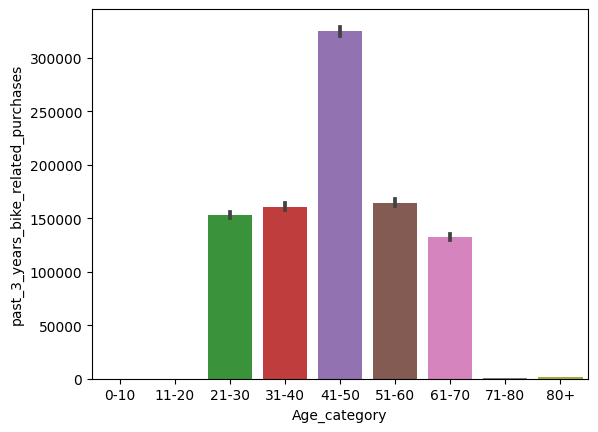

In [284]:
sns.barplot(x= Transaction['Age_category'], y = Transaction['past_3_years_bike_related_purchases'],estimator=sum)

<Axes: xlabel='Age_category', ylabel='profit'>

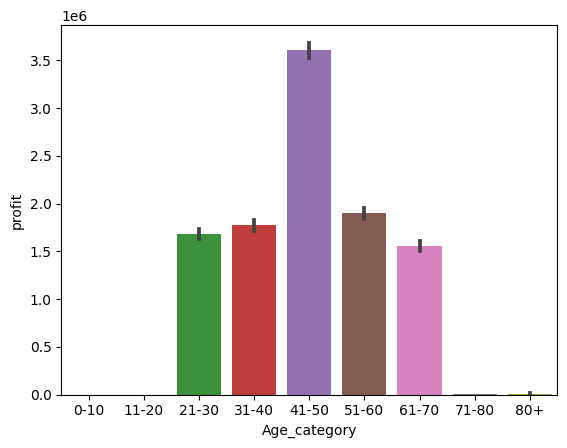

In [285]:
sns.barplot(x= Transaction['Age_category'], y = Transaction['profit'], estimator='sum')

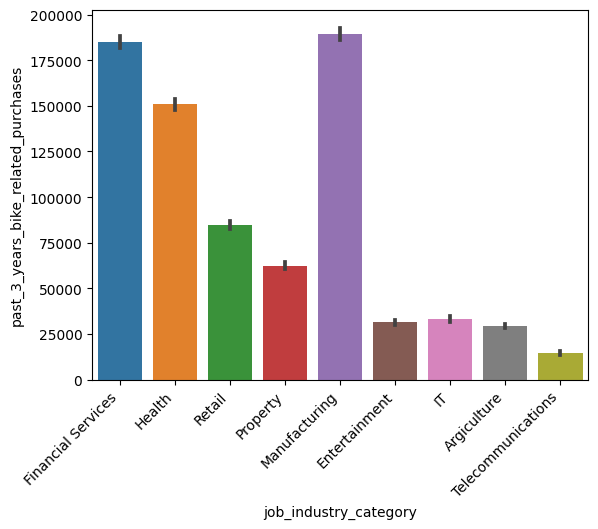

In [286]:
#Filter Out No data 
temp = Transaction[Transaction['job_industry_category'] != 'no data']

#Graph Plot
JIB = sns.barplot(x= temp['job_industry_category'], y = temp['past_3_years_bike_related_purchases'], estimator=sum)
JIB.set_xticklabels(JIB.get_xticklabels(), rotation =45, horizontalalignment = 'right');


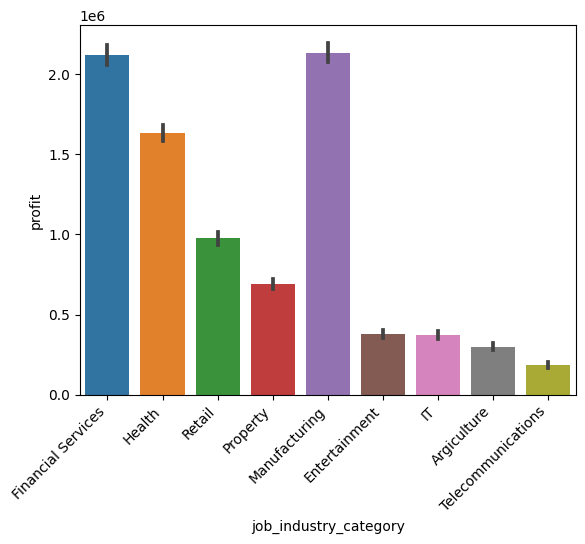

In [287]:
JIP = sns.barplot(x= temp['job_industry_category'], y = temp['profit'], estimator='sum')
JIP.set_xticklabels(JIP.get_xticklabels(), rotation =45, horizontalalignment = 'right');

<Axes: xlabel='state', ylabel='profit'>

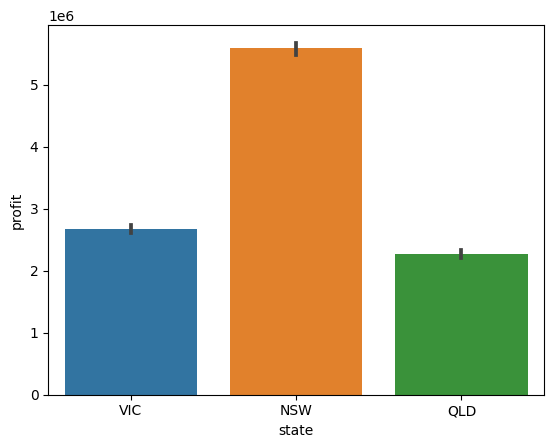

In [288]:
sns.barplot(x= Transaction['state'], y = Transaction['profit'], estimator='sum')

<Axes: xlabel='product_line', ylabel='profit'>

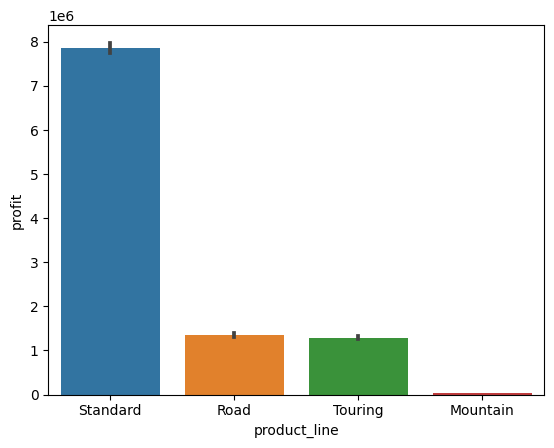

In [289]:
sns.barplot(x= Transaction['product_line'], y = Transaction['profit'], estimator='sum')

<Axes: xlabel='product_size', ylabel='profit'>

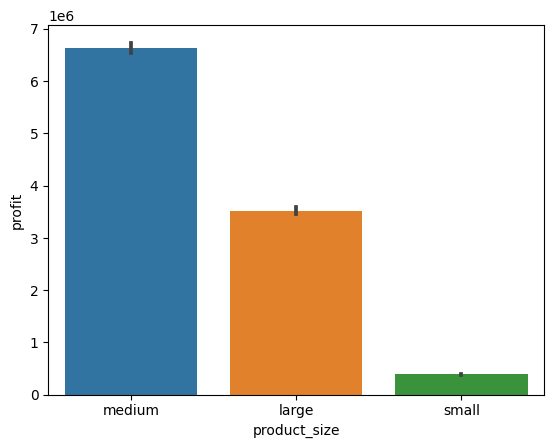

In [290]:
sns.barplot(x= Transaction['product_size'], y = Transaction['profit'], estimator='sum')

<Axes: xlabel='product_class', ylabel='profit'>

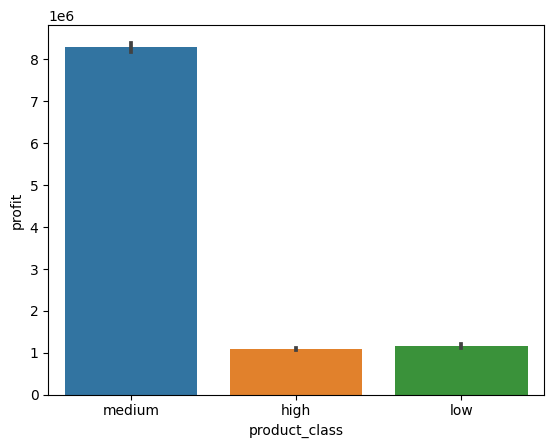

In [291]:
sns.barplot(x= Transaction['product_class'], y = Transaction['profit'], estimator='sum')

<Axes: xlabel='wealth_segment', ylabel='profit'>

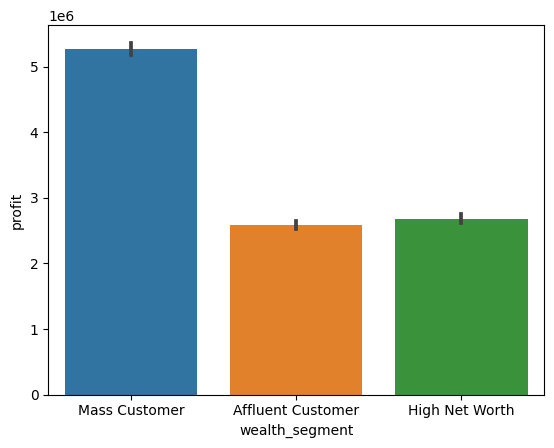

In [292]:
sns.barplot(x= Transaction['wealth_segment'], y = Transaction['profit'], estimator='sum')

<Axes: xlabel='gender', ylabel='profit'>

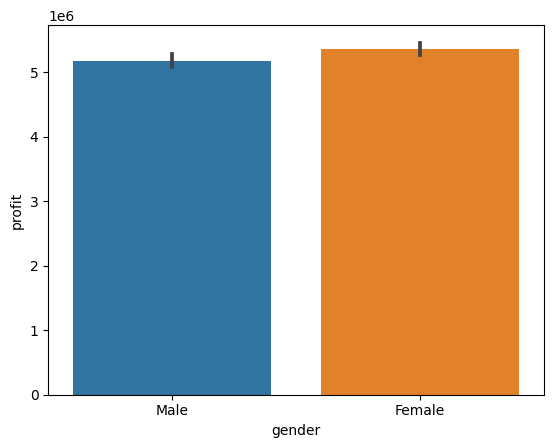

In [293]:
sns.barplot(x= Transaction['gender'], y = Transaction['profit'], estimator='sum')

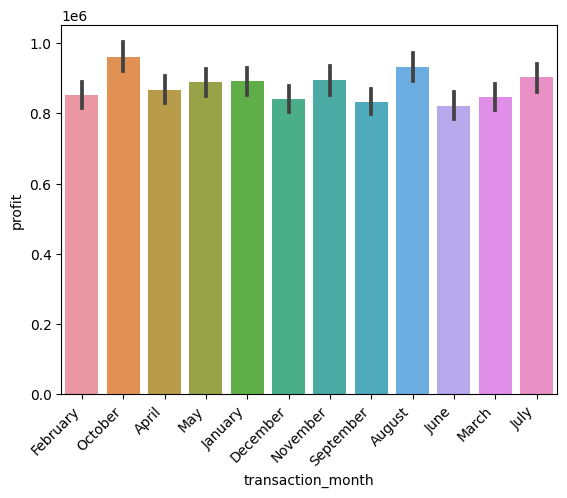

In [294]:
MP = sns.barplot(x= Transaction['transaction_month'], y = Transaction['profit'], estimator='sum')
MP.set_xticklabels(MP.get_xticklabels(), rotation =45, horizontalalignment = 'right');

## Categorical-Categorical Column
**Conclusion**
- Among customers who own a car, 55% are from New South Wales (NSW)
- The male-to-female ratio across the states is nearly equal, with slightly more female customers than male customers

In [295]:
pd.crosstab(Transaction['owns_car'],Transaction['state'], normalize= 'index')*100

state,NSW,QLD,VIC
owns_car,,,
No,52.035250,21.642887,26.321863
Yes,54.764877,21.202663,24.032459


<Axes: xlabel='state', ylabel='owns_car'>

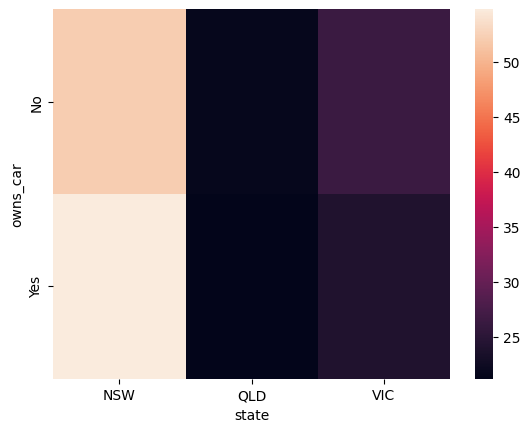

In [296]:
sns.heatmap(pd.crosstab(Transaction['owns_car'],Transaction['state'], normalize= 'index')*100)

<Axes: xlabel='state', ylabel='count'>

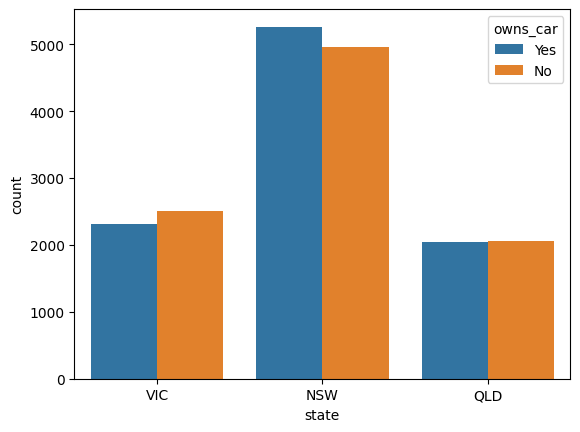

In [297]:
sns.countplot(x= Transaction['state'], hue= Transaction['owns_car'])

<Axes: xlabel='owns_car', ylabel='count'>

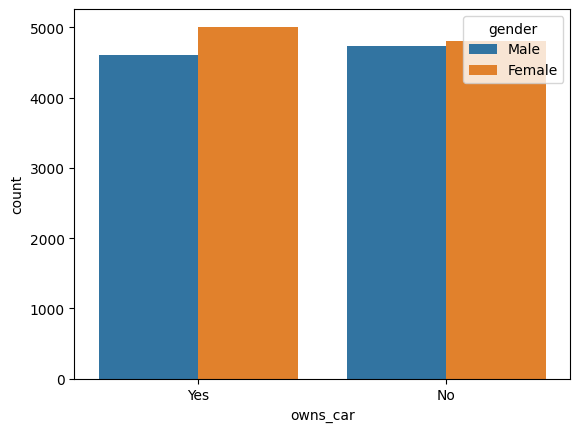

In [298]:
sns.countplot(data=Transaction, x='owns_car', hue='gender')


In [299]:
pd.crosstab(Transaction['gender'],Transaction['state'], normalize= 'columns')*100

state,NSW,QLD,VIC
gender,,,
Female,51.633412,50.207267,51.276198
Male,48.366588,49.792733,48.723802


<Axes: xlabel='state', ylabel='gender'>

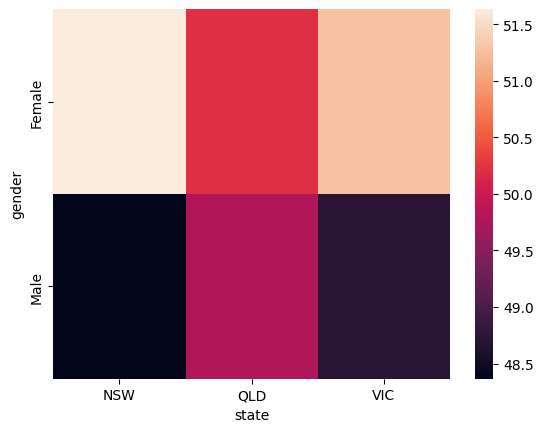

In [300]:
sns.heatmap(pd.crosstab(Transaction['gender'],Transaction['state'], normalize= 'columns')*100)

<Axes: xlabel='state', ylabel='count'>

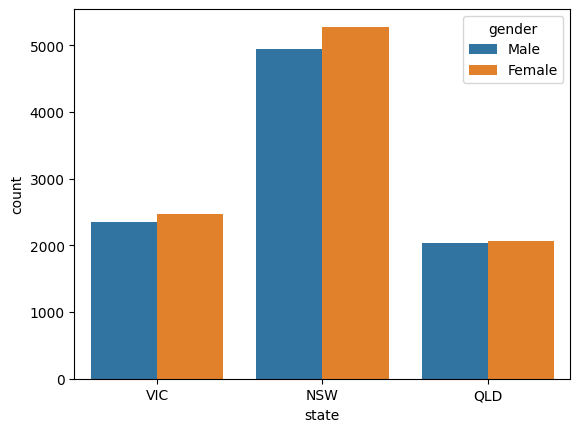

In [301]:
sns.countplot(x= Transaction['state'], hue= Transaction['gender'])

### Multiveriant Analysis
**Conclustion**
- The 40-50 age group within the mass customer segment generates more profit
- he top three industry sectors making the most substantial profit contributions to the bike-related market are: Financial Services, Health, and Manufacturing.
- Individuals who own a car in New South Whale state have contributed significantly more to the profit compared to those who don't own a car


In [302]:
Age_wealth_profit =pd.crosstab(Transaction['Age_category'], Transaction['wealth_segment'], values= Transaction['profit'], aggfunc= 'sum')
Age_wealth_profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
Age_category,,,
0-10,0.00,0.00,0.00
11-20,0.00,0.00,0.00
21-30,466023.82,377932.83,842711.24
31-40,419615.65,484555.03,870560.40
41-50,846006.30,906118.32,1851293.12
51-60,484021.38,503523.08,913144.26
61-70,361476.15,402059.48,791543.74
71-80,2596.17,4523.23,0.00
80+,7212.17,0.00,2977.11


<Axes: xlabel='wealth_segment', ylabel='Age_category'>

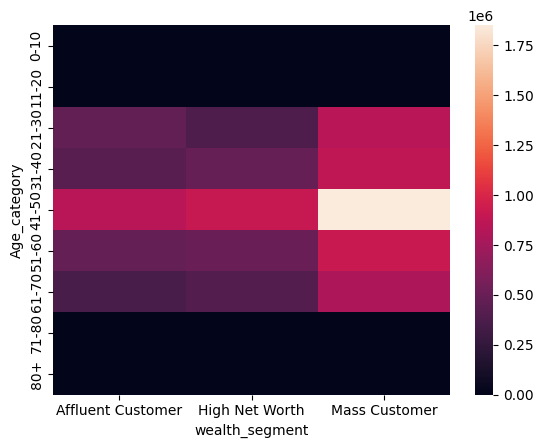

In [303]:
sns.heatmap(Age_wealth_profit)

<Axes: xlabel='Age_category', ylabel='profit'>

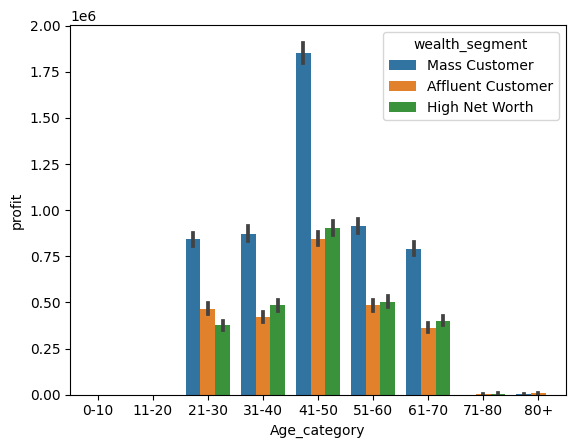

In [304]:
sns.barplot(x= 'Age_category', y = 'profit', hue = 'wealth_segment', data = Transaction ,estimator=sum)

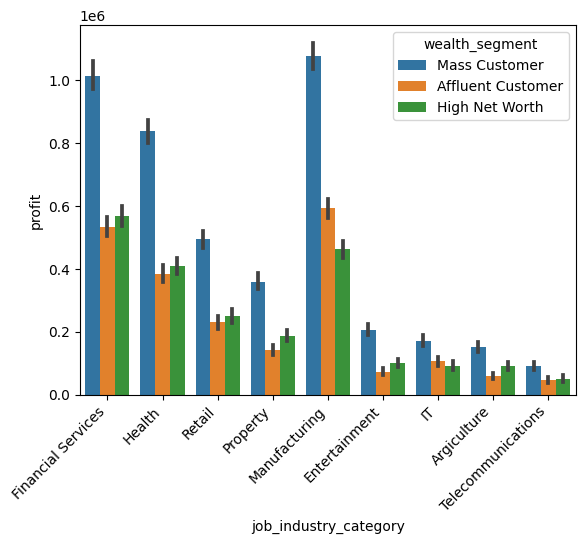

In [305]:
JIBW = sns.barplot(x= 'job_industry_category', y = 'profit', hue = 'wealth_segment', data = temp ,estimator=sum)
JIBW.set_xticklabels(JIBW.get_xticklabels(), rotation =45, horizontalalignment = 'right');

<Axes: xlabel='state', ylabel='profit'>

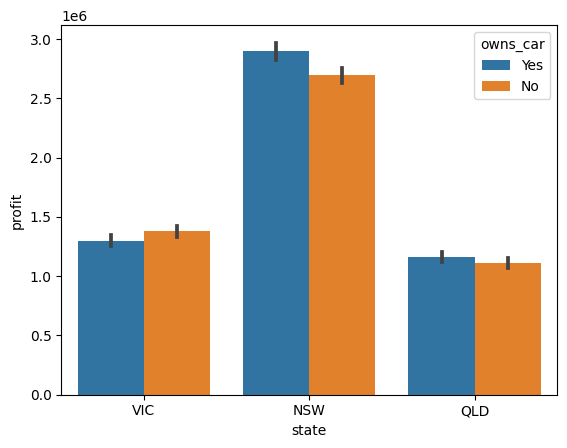

In [306]:
sns.barplot(x= 'state', y = 'profit', hue = 'owns_car', data = Transaction ,estimator=sum)

<Axes: xlabel='product_class', ylabel='profit'>

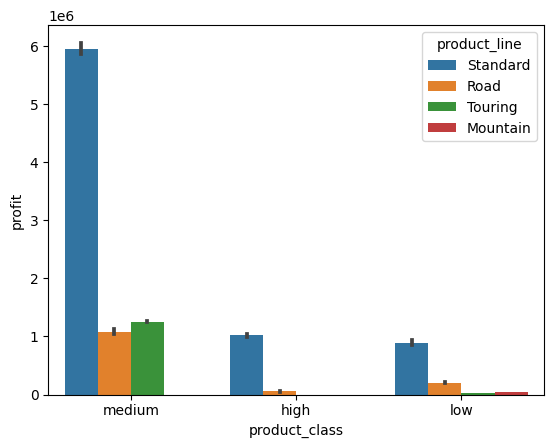

In [307]:
sns.barplot(x= 'product_class', y = 'profit', hue = 'product_line', data = Transaction ,estimator=sum)

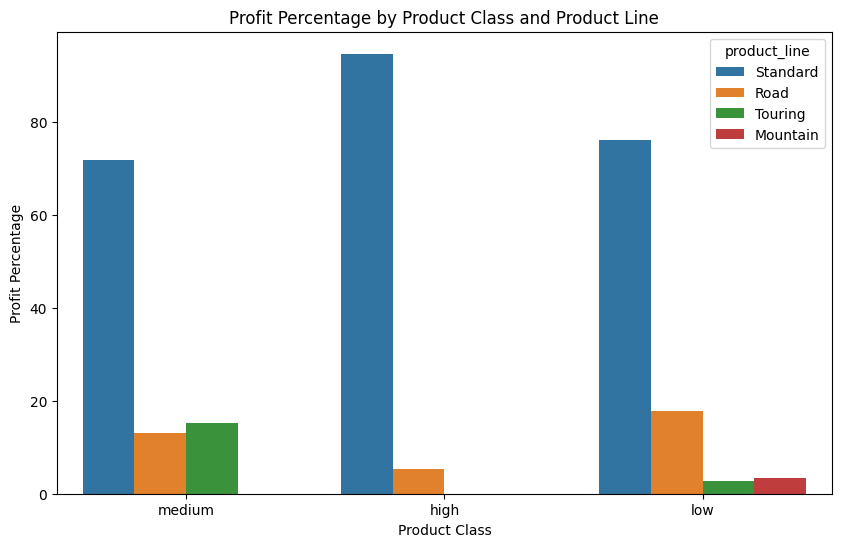

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of profit for each combination of product_class and product_line
Transaction['profit_percentage'] = (Transaction.groupby(['product_class', 'product_line'])['profit'].transform('sum') / Transaction.groupby(['product_class'])['profit'].transform('sum')) * 100

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='product_class', y='profit_percentage', hue='product_line', data=Transaction)
plt.xlabel('Product Class')
plt.ylabel('Profit Percentage')
plt.title('Profit Percentage by Product Class and Product Line')
plt.show()


## RMF Table

### Calculate RMF Value To Find Valuable Customer

In [309]:
#Create a groupby customer_id table
RMF_table = Transaction.groupby('customer_id').agg({
    'Recency' : 'min',
    'product_id' : 'count',
    'profit' : 'sum'
})

RMF_table.columns = ['min_recency', 'count_product_id', 'Sum_of_profit'] 

In [310]:
#Function to calculate
# M_score and F_score
def M_F_score(value, percentile_values):
    if value <= percentile_values[1]:
        return 1
    elif value <= percentile_values[2]:
        return 2
    elif value <= percentile_values[3]:
        return 3
    else:
        return 4

#R_score
def R_score(value, percentile_values):
    if value <= percentile_values[1]:
        return 4
    elif value <= percentile_values[2]:
        return 3
    elif value <= percentile_values[3]:
        return 2
    else:
        return 1
    
#Cutomer Category
def customer_title(value, percentile_values):
    if value <= percentile_values[1]:
        return 'Bronze'
    elif value <= percentile_values[2]:
        return 'Silver'
    elif value <= percentile_values[3]:
        return 'Gold'
    else:
        return 'Platinum'


#Percentile
percentiles = [0, 25, 50, 75, 100]

In [311]:
# Calculate the specified percentiles for 'min_recency' column
percentile_values = [RMF_table['min_recency'].quantile(p/100) for p in percentiles]

# Apply the assign_score function to create the 'R_score' column
RMF_table['R_score'] = RMF_table['min_recency'].apply(R_score, args=[percentile_values])

In [312]:
# Calculate the specified percentiles for 'count_product_id' column
percentile_values = [RMF_table['count_product_id'].quantile(p/100) for p in percentiles]

# Apply the assign_score function to create the 'R_score' column
RMF_table['F_score'] = RMF_table['count_product_id'].apply(M_F_score, args=[percentile_values])

In [313]:
# Calculate the specified percentiles for 'Sum_of_profit' column
percentile_values = [RMF_table['Sum_of_profit'].quantile(p/100) for p in percentiles]

# Apply the assign_score function to create the 'R_score' column
RMF_table['M_score'] = RMF_table['Sum_of_profit'].apply(M_F_score, args=[percentile_values])

In [314]:
#Calculate RMF score col
RMF_table['RMF_score'] = RMF_table['R_score'] * 100 + RMF_table['F_score'] * 10 + RMF_table['M_score']

In [315]:
# Calculate the specified percentiles for 'RMF_score' column
percentile_values = [RMF_table['RMF_score'].quantile(p/100) for p in percentiles]

RMF_table['Customer_title'] = RMF_table['RMF_score'].apply(customer_title, args=[percentile_values])

In [316]:
RMF_table.reset_index()

,customer_id,min_recency,count_product_id,Sum_of_profit,R_score,F_score,M_score,RMF_score,Customer_title
0,1,7 days,11,3018.09,4,4,3,443,Platinum
1,2,128 days,3,2226.26,1,1,2,112,Bronze
2,4,195 days,2,220.57,1,1,1,111,Bronze
3,5,16 days,6,2394.94,4,3,2,432,Platinum
4,6,64 days,5,3946.55,2,2,3,223,Silver
...,...,...,...,...,...,...,...,...,...
3405,3496,256 days,4,2045.84,1,1,2,112,Bronze
3406,3497,52 days,3,1648.32,2,1,1,211,Bronze
3407,3498,127 days,6,3147.33,1,3,3,133,Bronze
3408,3499,51 days,7,4955.25,2,3,4,234,Silver


## Categorical Column

### Customer_title
**Conclusion**
- The majority of customers have a "Bronze" customer_title, followed by "Gold" at second place, with 29% and 27% respectively.

In [317]:
RMF_table['Customer_title'].value_counts()

Bronze      992
Gold        920
Platinum    785
Silver      713
Name: Customer_title, dtype: int64

<Axes: xlabel='Customer_title', ylabel='count'>

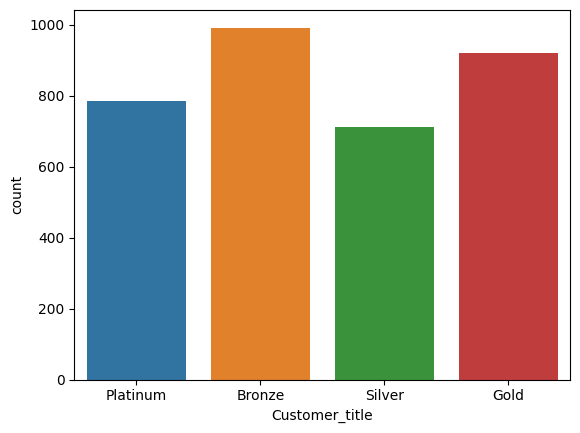

In [318]:
sns.countplot(x=RMF_table['Customer_title'])

<Axes: ylabel='Customer_title'>

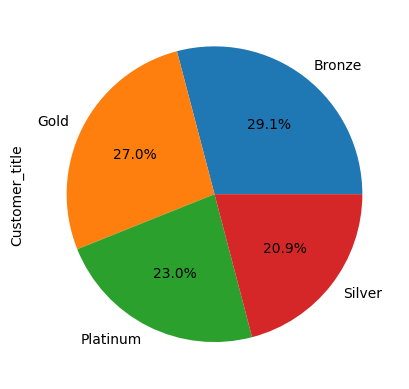

In [319]:
RMF_table['Customer_title'].value_counts().plot(kind='pie', autopct='%0.1f%%')

<Axes: xlabel='Customer_title', ylabel='Sum_of_profit'>

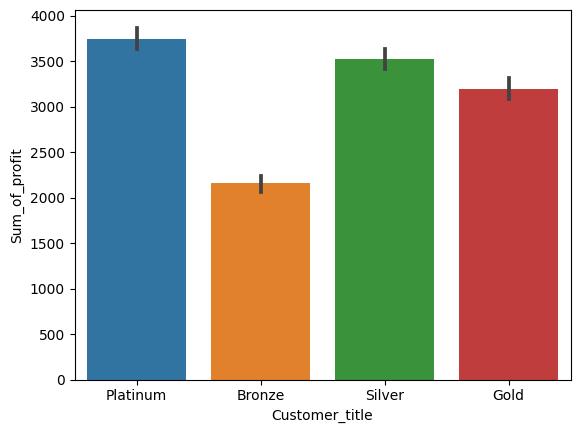

In [320]:
sns.barplot(x= RMF_table['Customer_title'], y = RMF_table['Sum_of_profit'])




## NewCustomerList_df Table


In [321]:
NewCustomerList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

### Column Type
- Numerical Column : past_3_years_bike_related_purchases, DOB, tenure, postcode, property_valuation, Rank, Value, Age

- Categorical data : gender, job_industry_category, wealth_segment, owns_car, state, Age_category

- Mixed : first_name, last_name, job_title, deceased_indicator, address, country

# Univeriant Analysis
## Numerical Column
### Age
**Conclusion**
- No outliers in the age column
- Most of the new customers fall within the age range of 40 to 50
- Almost normal distributed

In [322]:
NewCustomerList_df['Age'].describe()

count    983.000000
mean      51.944049
std       17.077394
min       21.000000
25%       40.000000
50%       51.000000
75%       65.500000
max       85.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

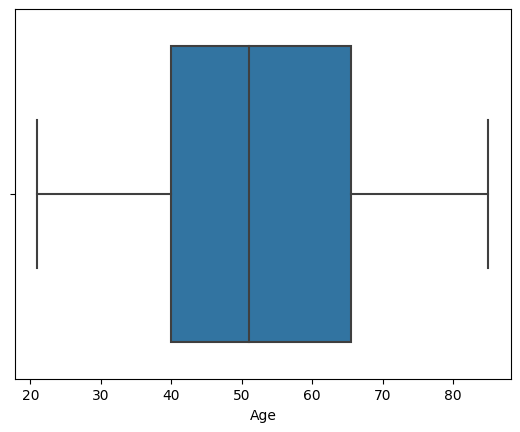

In [323]:
sns.boxplot(x= NewCustomerList_df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

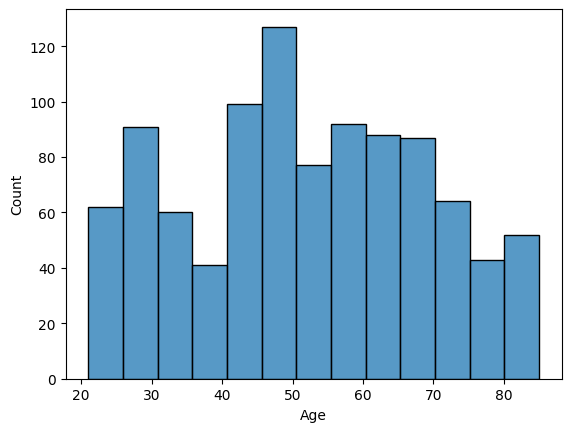

In [324]:
sns.histplot(x= NewCustomerList_df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

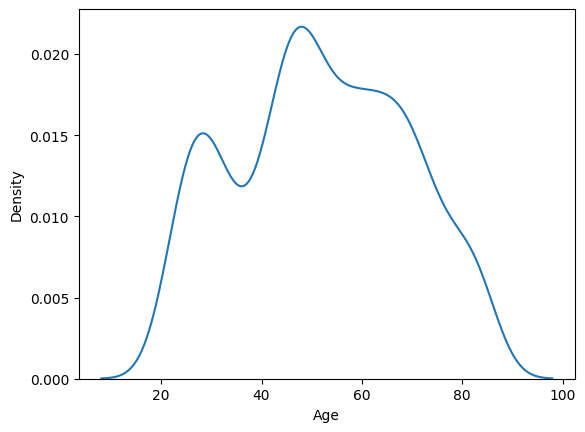

In [325]:
sns.kdeplot(x= NewCustomerList_df['Age'])

In [326]:
NewCustomerList_df['Age'].skew()

0.013583484398331338

In [327]:
NewCustomerList_df['Age'].isnull().sum()

0

### past_3_years_bike_related_purchases
**Conclusion**
- Not any null values
- Not any outlier
- Almost Normally distributed

In [328]:
NewCustomerList_df['past_3_years_bike_related_purchases'].describe()

count    983.000000
mean      49.824008
std       27.786108
min        0.000000
25%       27.000000
50%       51.000000
75%       72.000000
max       99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

<Axes: xlabel='past_3_years_bike_related_purchases'>

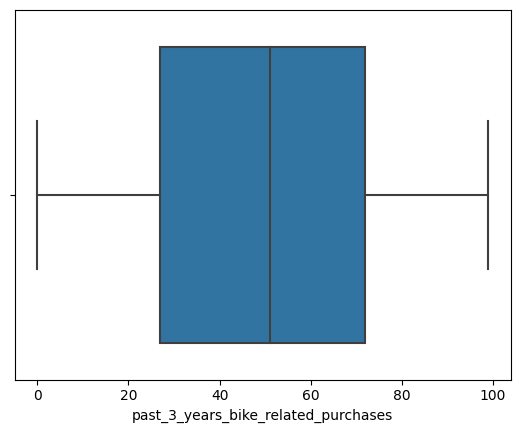

In [329]:
sns.boxplot(x= NewCustomerList_df['past_3_years_bike_related_purchases'])

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

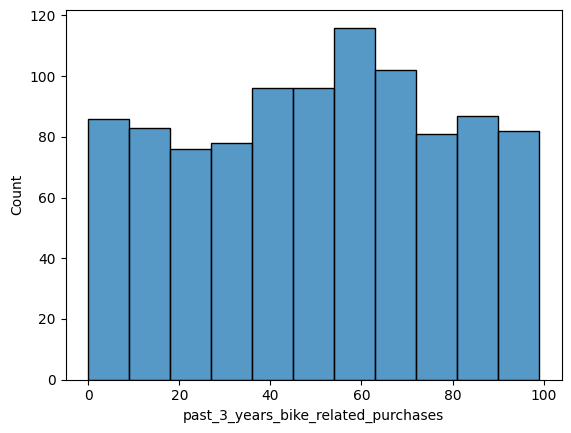

In [330]:
sns.histplot(x= NewCustomerList_df['past_3_years_bike_related_purchases'])

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

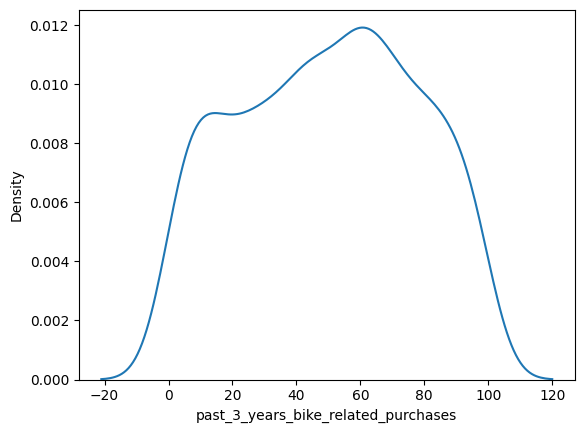

In [331]:
sns.kdeplot(x= NewCustomerList_df['past_3_years_bike_related_purchases'])

In [332]:
NewCustomerList_df['past_3_years_bike_related_purchases'].skew()

-0.06072476613460715

In [333]:
NewCustomerList_df['past_3_years_bike_related_purchases'].isnull().sum()

0

## Categorical Column

### gender
**Conclusion**
- Among customers, females slightly outnumber males

In [334]:
NewCustomerList_df['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

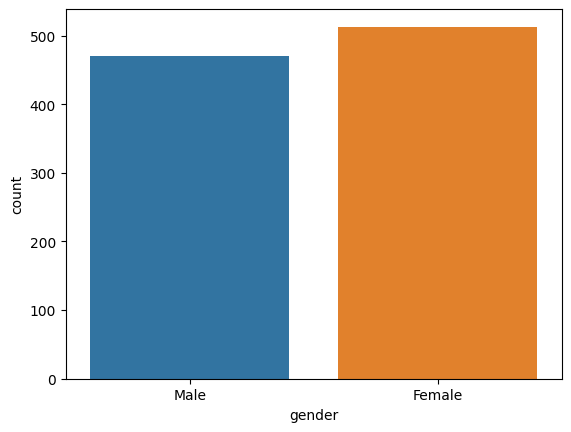

In [335]:
sns.countplot(x= NewCustomerList_df['gender'])

<Axes: ylabel='gender'>

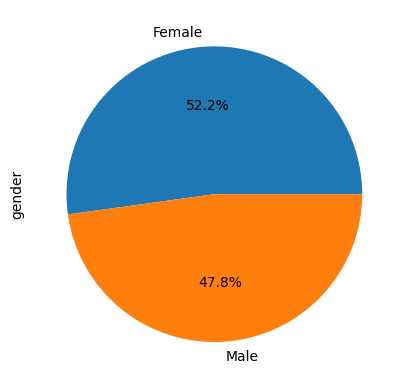

In [336]:
NewCustomerList_df['gender'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### wealth_segment
**Conclusion**
- 50% of customers belong to the Mass Customer category

In [337]:
NewCustomerList_df['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

<Axes: xlabel='wealth_segment', ylabel='count'>

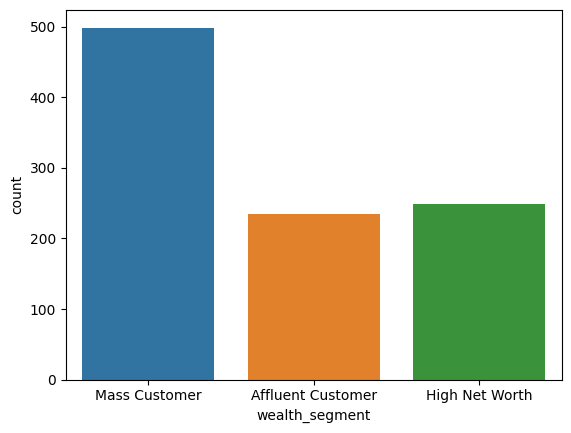

In [338]:
sns.countplot(x= NewCustomerList_df['wealth_segment'])

<Axes: ylabel='wealth_segment'>

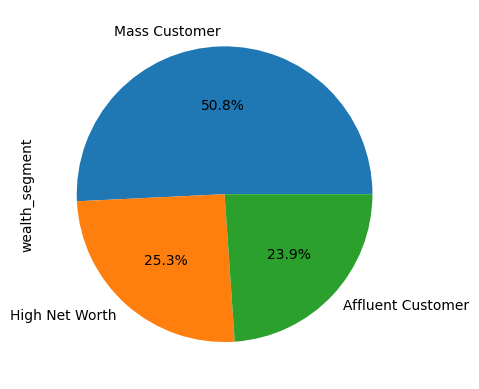

In [339]:
NewCustomerList_df['wealth_segment'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### owns_car
**Conclusion**
- Approximately 50% of customers own a car, while the remaining 50% do not own a car.

In [340]:
NewCustomerList_df['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

<Axes: xlabel='owns_car', ylabel='count'>

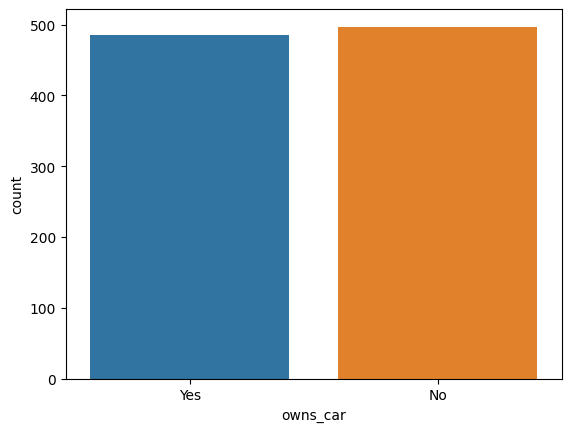

In [341]:
sns.countplot(x= NewCustomerList_df['owns_car'])

<Axes: ylabel='owns_car'>

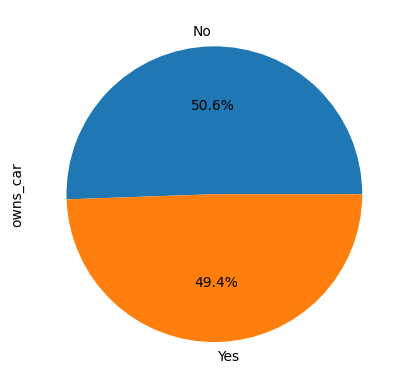

In [342]:
NewCustomerList_df['owns_car'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### state
**Conclusion**
- Among the three states, more than 50% of customers are from New South Wales, Australia

In [343]:
NewCustomerList_df['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

<Axes: xlabel='state', ylabel='count'>

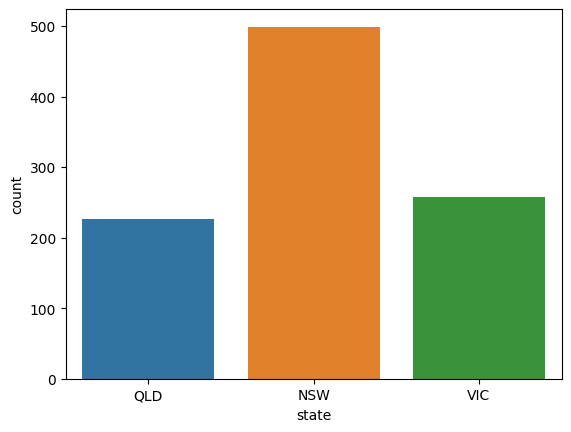

In [344]:
sns.countplot(x= NewCustomerList_df['state'])

<Axes: ylabel='state'>

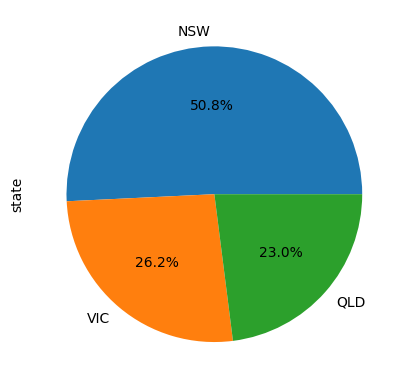

In [345]:
NewCustomerList_df['state'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

### Age_category
**Conclusion**
- 23% of customers are in 40-50.

In [346]:
NewCustomerList_df['Age_category'].value_counts()

41-50    226
61-70    175
51-60    169
21-30    153
71-80    107
31-40    101
80+       52
0-10       0
11-20      0
Name: Age_category, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

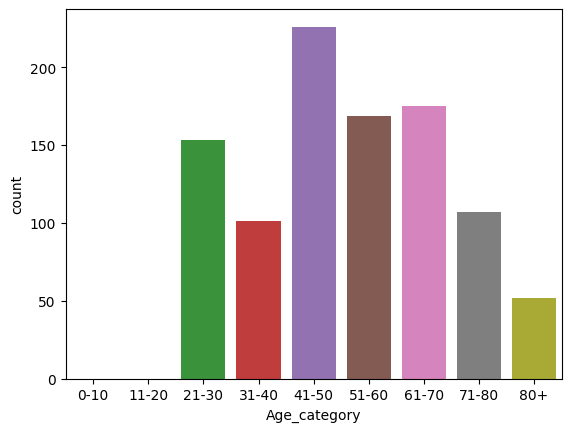

In [347]:
sns.countplot(x= NewCustomerList_df['Age_category'])

<Axes: ylabel='Age_category'>

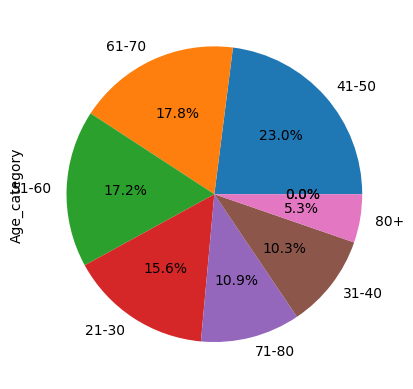

In [348]:
NewCustomerList_df['Age_category'].value_counts().plot(kind='pie', autopct= '%0.1f%%')

##### Biveriant Analysis

## Categorical-Numerical Column
**Conclusion**
- People in their 40-50 have slightly more bikes than other age groups

<Axes: xlabel='Age_category', ylabel='past_3_years_bike_related_purchases'>

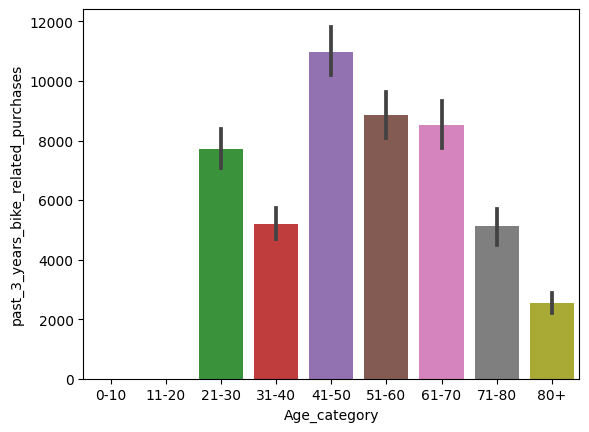

In [349]:
sns.barplot(x= NewCustomerList_df['Age_category'], y = NewCustomerList_df['past_3_years_bike_related_purchases'], estimator=sum)

In [350]:
#Interpretation table
NewCustomerList_df[(NewCustomerList_df['Age_category'] == '31-40') &  (NewCustomerList_df['state'] == 'NSW') & (NewCustomerList_df['owns_car'] == 'Yes') & (NewCustomerList_df['state'] == 'NSW') & (NewCustomerList_df['owns_car'] == 'Yes') & (NewCustomerList_df['wealth_segment']== 'Mass Customer')]



,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_category
32,Sybilla,MacCart,Female,88,1987-01-15,Paralegal,Financial Services,Mass Customer,N,Yes,7,74 Welch Pass,2620,NSW,Australia,7,32,1.453125,36.0,31-40
171,Feodor,Vickers,Male,60,1989-11-18,VP Quality Control,Financial Services,Mass Customer,N,Yes,4,40809 Truax Way,2209,NSW,Australia,6,173,1.171875,33.0,31-40
293,Biddie,Gorce,Female,68,1988-01-30,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,5,2116 Continental Terrace,2795,NSW,Australia,7,295,1.031250,35.0,31-40
386,Kipp,Stockport,Male,36,1982-12-10,Data Coordiator,Retail,Mass Customer,N,Yes,6,02 Roth Drive,2022,NSW,Australia,11,386,0.945625,40.0,31-40
434,Theresina,no data,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000,36.0,31-40
684,Gardiner,Gypps,Male,91,1991-06-01,VP Product Management,Retail,Mass Customer,N,Yes,13,1 Elgar Alley,2166,NSW,Australia,9,691,0.690625,32.0,31-40
816,Toma,Woolforde,Female,67,1992-03-09,Cost Accountant,Financial Services,Mass Customer,N,Yes,5,76 Melody Avenue,2092,NSW,Australia,12,830,0.578000,31.0,31-40
916,Stephi,Highton,Female,30,1987-09-09,Software Engineer I,Telecommunications,Mass Customer,N,Yes,12,293 Mendota Park,2154,NSW,Australia,10,930,0.478125,36.0,31-40
963,Daryle,Marginson,Male,93,1986-06-27,Environmental Tech,Argiculture,Mass Customer,N,Yes,9,21316 Ohio Place,2121,NSW,Australia,12,979,0.416500,37.0,31-40
964,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,no data,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,31.0,31-40


# DBMS Normalization
### Now EDA is done time to do DBMS Normalization
**Transaction Table**
### 1NF

In [351]:
Transaction.duplicated().sum()

0

In [352]:
CustomerDemographic = Transaction[['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases',
                                   'DOB','job_title','job_industry_category','wealth_segment','owns_car','tenure',
                                   'Age_category','postcode','address','state','country', 'property_valuation']].drop_duplicates()

In [353]:
#Merge RMF table with CustomerDemographic
CustomerDemographic = CustomerDemographic.merge(RMF_table['Customer_title'], on= 'customer_id')
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age_category,postcode,address,state,country,property_valuation,Customer_title
0,2950,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,61-70,3064,984 Hoepker Court,VIC,Australia,6,Bronze
1,3120,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10,41-50,2196,4 Shopko Circle,NSW,Australia,5,Gold
2,402,Berne,Donegan,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22,41-50,2835,586 Miller Parkway,NSW,Australia,1,Silver
3,3135,Titus,Worsall,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16,61-70,2096,1617 Harper Parkway,NSW,Australia,10,Bronze
4,787,Norma,Batrim,Female,29,1996-12-15,no data,Retail,Affluent Customer,Yes,2,21-30,2292,0601 Stephen Place,NSW,Australia,7,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,2789,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,Yes,7,21-30,2112,724 West Park,NSW,Australia,11,Gold
3406,3446,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,No,14,51-60,4868,8 Becker Drive,QLD,Australia,4,Gold
3407,2764,Callie,Coltart,Female,12,1955-03-29,no data,Financial Services,Mass Customer,Yes,20,61-70,4301,1 Wayridge Park,QLD,Australia,1,Bronze
3408,3168,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,No,22,41-50,4215,88 Rutledge Crossing,QLD,Australia,7,Bronze


In [354]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3409
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3410 non-null   int64         
 1   first_name                           3410 non-null   object        
 2   last_name                            3410 non-null   object        
 3   gender                               3410 non-null   object        
 4   past_3_years_bike_related_purchases  3410 non-null   int64         
 5   DOB                                  3410 non-null   datetime64[ns]
 6   job_title                            3410 non-null   object        
 7   job_industry_category                3410 non-null   object        
 8   wealth_segment                       3410 non-null   object        
 9   owns_car                             3410 non-null   object        
 10  tenure      

In [355]:
CustomerDemographic['customer_id'].duplicated().sum()

0

In [356]:
CustomerDemographic['Customer_title'].isnull().sum()

0

In [357]:
#Drop_columns
Transaction = Transaction.drop(columns=['first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases',
                                   'DOB','job_title','job_industry_category','wealth_segment','owns_car','tenure',
                                   'Age_category','postcode','profit_percentage','address','state','country', 'property_valuation', 'Recency', 'Age','deceased_indicator'])

In [358]:
Transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,transaction_month
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87,February
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-09,448.68,October
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-07,179.44,April
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55,May
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-18,451.65,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,18735,45,3168,2017-02-21,1,Approved,Solex,Standard,medium,medium,441.49,84.99,2015-06-19,356.50,February
19323,18789,83,3168,2017-04-11,0,Approved,Solex,Touring,medium,large,2083.94,675.03,2010-05-07,1408.91,April
19324,19113,3,3168,2017-06-03,0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-07-23,1702.55,June
19325,19912,3,3168,2017-09-30,0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2013-09-18,1702.55,September


# Export the Data to Excel
### Time to export it so use it in power Bi for Visulaisation

In [359]:
with pd.ExcelWriter("KMPG_visulisation_data.xlsx") as writer: 
    Transaction.to_excel(writer, sheet_name="Transaction", index= False)
    CustomerDemographic.to_excel(writer, sheet_name="CustomerDemographic", index= False)
    NewCustomerList_df.to_excel(writer, sheet_name="NewCustomerList", index= False)